# Fraud Detection in Insurance Claims Data

<a id='outline'></a>

### Outline


<b> 1. [Introduction](#intro) <br><br>
2. [Importing Libraries and Data](#import) <br><br>
3. [Exploratory Data Analysis](#analysis) <br>
</b>3.1. [DataFrame Description](#analysis-1) <br>
3.2. [Data Distribution](#analysis-2)<br><br>
<b>4. [Data Preprocessing](#preprocessing) <br>
</b>4.1. [Handling Missing Values](#preprocessing-1) <br>
4.2. [Encoding Categorical Features](#preprocessing-2)<br>
4.3. [Handling Outliers](#preprocessing-3) <br>
4.4. [Scaling Data](#preprocessing-4)<br>
4.5. [Handling Imbalanced Data](#preprocessing-5)<br><br>
<b>5. [Creating ML Models](#mlmodels) <br>
</b>5.1. [Classification Models](#mlmodels-1) <br>
5.2. [Model Tuning](#mlmodels-2)<br>
5.3. [Feature Importance](#mlmodels-3)<br><br>
<b>6. [Conclusion](#conclusion) <br>
</b>

<br><br>

<a id='intro'></a>

## 1. Introduction

**Motivation**

A data science team could use anomaly detection techniques to identify unusual patterns or outliers in historical claims data. This could help identify potential fraud or other abnormal activity that could impact reinsurance pricing and underwriting decisions. Thus, we use a sample database to make **Fraud Detection Model with ML.**

**Dataset**

The dataset is generated and distributed in Kaggle by Bunty Shah. This dataset is accessible in Kaggle.
https://www.kaggle.com/datasets/buntyshah/auto-insurance-claims-data

**RoadMap**

<li>We begin our work by importing libraries and dataset. 
<li>Data will be analysed and then data preprocessing techniques will be applied. 
<li><b>Fraud Detection</b> requires <b>undersampling</b> or <b>oversampling</b> due to imbalanced distribution of target label. Therefore, before fitting and ML model, a proper technique will be applied.
<li>Then, we will apply classification algorithms to detect frauds. In Fraud detection we will use <b>recall</b> and <b>f1</b> scores that is the score stating how many of the fraud claims is detected by an algorithm.

<br>[Return to the Outline](#outline) <br>

<br><br>

<a id='import'></a>

## 2. Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") 

In [2]:
data = pd.read_csv("insurance_claims.csv")

In [3]:
# Copying the dataframe to keep the original unspoiled.
df = data.copy()

<br>[Return to the Outline](#outline) <br>

<br><br>

<a id='analysis'></a>

## 3. Exploratory Data Analysis

<a id='analysis-1'></a>

### 3.1. DataFrame Description

Firstly, let's check what our dataframe looks like.

In [4]:
df.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       2014-10-17           OH   
1                 228   42         342868       2006-06-27           IN   
2                 134   29         687698       2000-09-06           OH   
3                 256   41         227811       1990-05-25           IL   
4                 228   44         367455       2014-06-06           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...                     YES              71610         6510   
1       468176  ...                       ?               5070          780   
2       430632  ...                      NO              34650         7700   
3       608117  ...                      NO              63400         6340   
4       610706  ...                      NO               6500         1300   

  property_claim vehicle_claim  auto_make  auto_model auto_year  \
0          13020         52080       Saab         92x      2004   
1            780          3510   Mercedes        E400      2007   
2           3850         23100      Dodge         RAM      2007   
3           6340         50720  Chevrolet       Tahoe      2014   
4            650          4550     Accura         RSX      2009   

  fraud_reported _c39  
0              Y  NaN  
1              Y  NaN  
2              N  NaN  
3              Y  NaN  
4              N  NaN  

[5 rows x 40 columns]

In [5]:
df.describe().T

count          mean           std         min  \
months_as_customer           1000.0  2.039540e+02  1.151132e+02        0.00   
age                          1000.0  3.894800e+01  9.140287e+00       19.00   
policy_number                1000.0  5.462386e+05  2.570630e+05   100804.00   
policy_deductable            1000.0  1.136000e+03  6.118647e+02      500.00   
policy_annual_premium        1000.0  1.256406e+03  2.441674e+02      433.33   
umbrella_limit               1000.0  1.101000e+06  2.297407e+06 -1000000.00   
insured_zip                  1000.0  5.012145e+05  7.170161e+04   430104.00   
capital-gains                1000.0  2.512610e+04  2.787219e+04        0.00   
capital-loss                 1000.0 -2.679370e+04  2.810410e+04  -111100.00   
incident_hour_of_the_day     1000.0  1.164400e+01  6.951373e+00        0.00   
number_of_vehicles_involved  1000.0  1.839000e+00  1.018880e+00        1.00   
bodily_injuries              1000.0  9.920000e-01  8.201272e-01        0.00   
witnesses                    1000.0  1.487000e+00  1.111335e+00        0.00   
total_claim_amount           1000.0  5.276194e+04  2.640153e+04      100.00   
injury_claim                 1000.0  7.433420e+03  4.880952e+03        0.00   
property_claim               1000.0  7.399570e+03  4.824726e+03        0.00   
vehicle_claim                1000.0  3.792895e+04  1.888625e+04       70.00   
auto_year                    1000.0  2.005103e+03  6.015861e+00     1995.00   
_c39                            0.0           NaN           NaN         NaN   

                                     25%       50%         75%          max  
months_as_customer              115.7500     199.5     276.250       479.00  
age                              32.0000      38.0      44.000        64.00  
policy_number                335980.2500  533135.0  759099.750    999435.00  
policy_deductable               500.0000    1000.0    2000.000      2000.00  
policy_annual_premium          1089.6075    1257.2    1415.695      2047.59  
umbrella_limit                    0.0000       0.0       0.000  10000000.00  
insured_zip                  448404.5000  466445.5  603251.000    620962.00  
capital-gains                     0.0000       0.0   51025.000    100500.00  
capital-loss                 -51500.0000  -23250.0       0.000         0.00  
incident_hour_of_the_day          6.0000      12.0      17.000        23.00  
number_of_vehicles_involved       1.0000       1.0       3.000         4.00  
bodily_injuries                   0.0000       1.0       2.000         2.00  
witnesses                         1.0000       1.0       2.000         3.00  
total_claim_amount            41812.5000   58055.0   70592.500    114920.00  
injury_claim                   4295.0000    6775.0   11305.000     21450.00  
property_claim                 4445.0000    6750.0   10885.000     23670.00  
vehicle_claim                 30292.5000   42100.0   50822.500     79560.00  
auto_year                      2000.0000    2005.0    2010.000      2015.00  
_c39                                 NaN       NaN         NaN          NaN

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

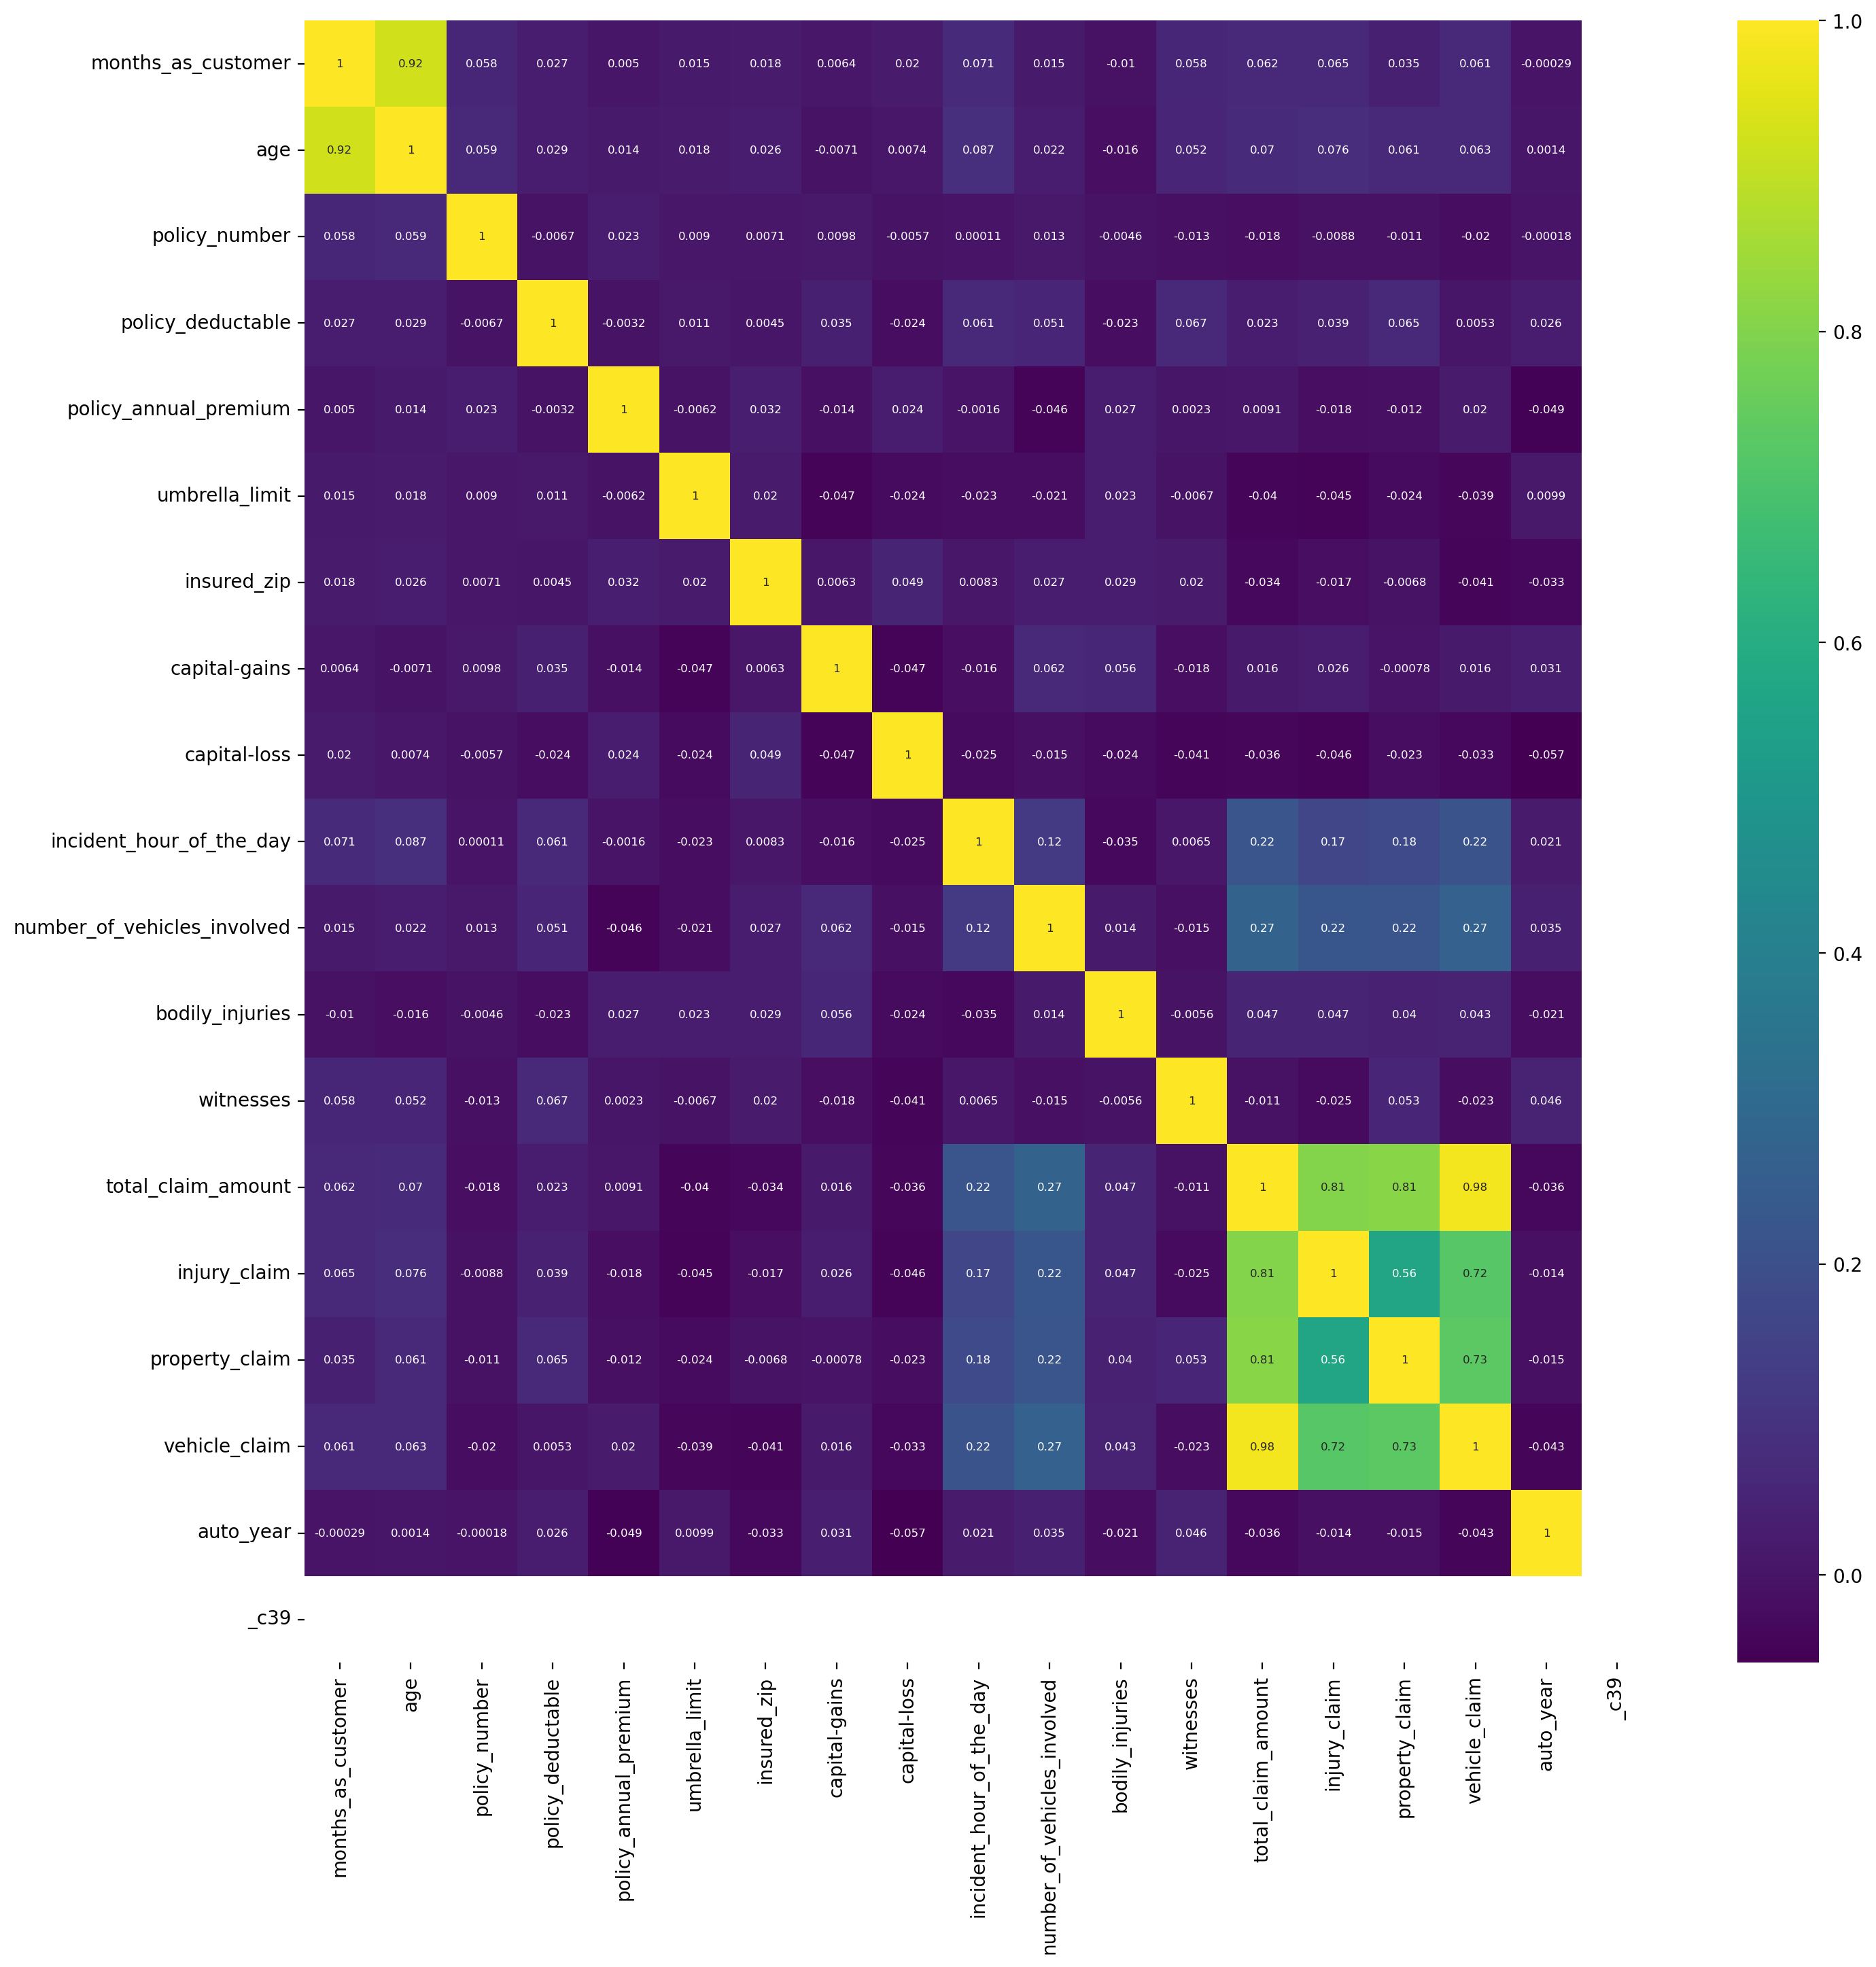

In [7]:
# Correlation between variables
plt.figure(figsize = (16,16), dpi = 200)
sns.heatmap(df.corr(), cbar=True, 
                 annot=True, 
                 annot_kws={'size': 6}, 
                 cmap="viridis");

<Figure size 1200x800 with 0 Axes>

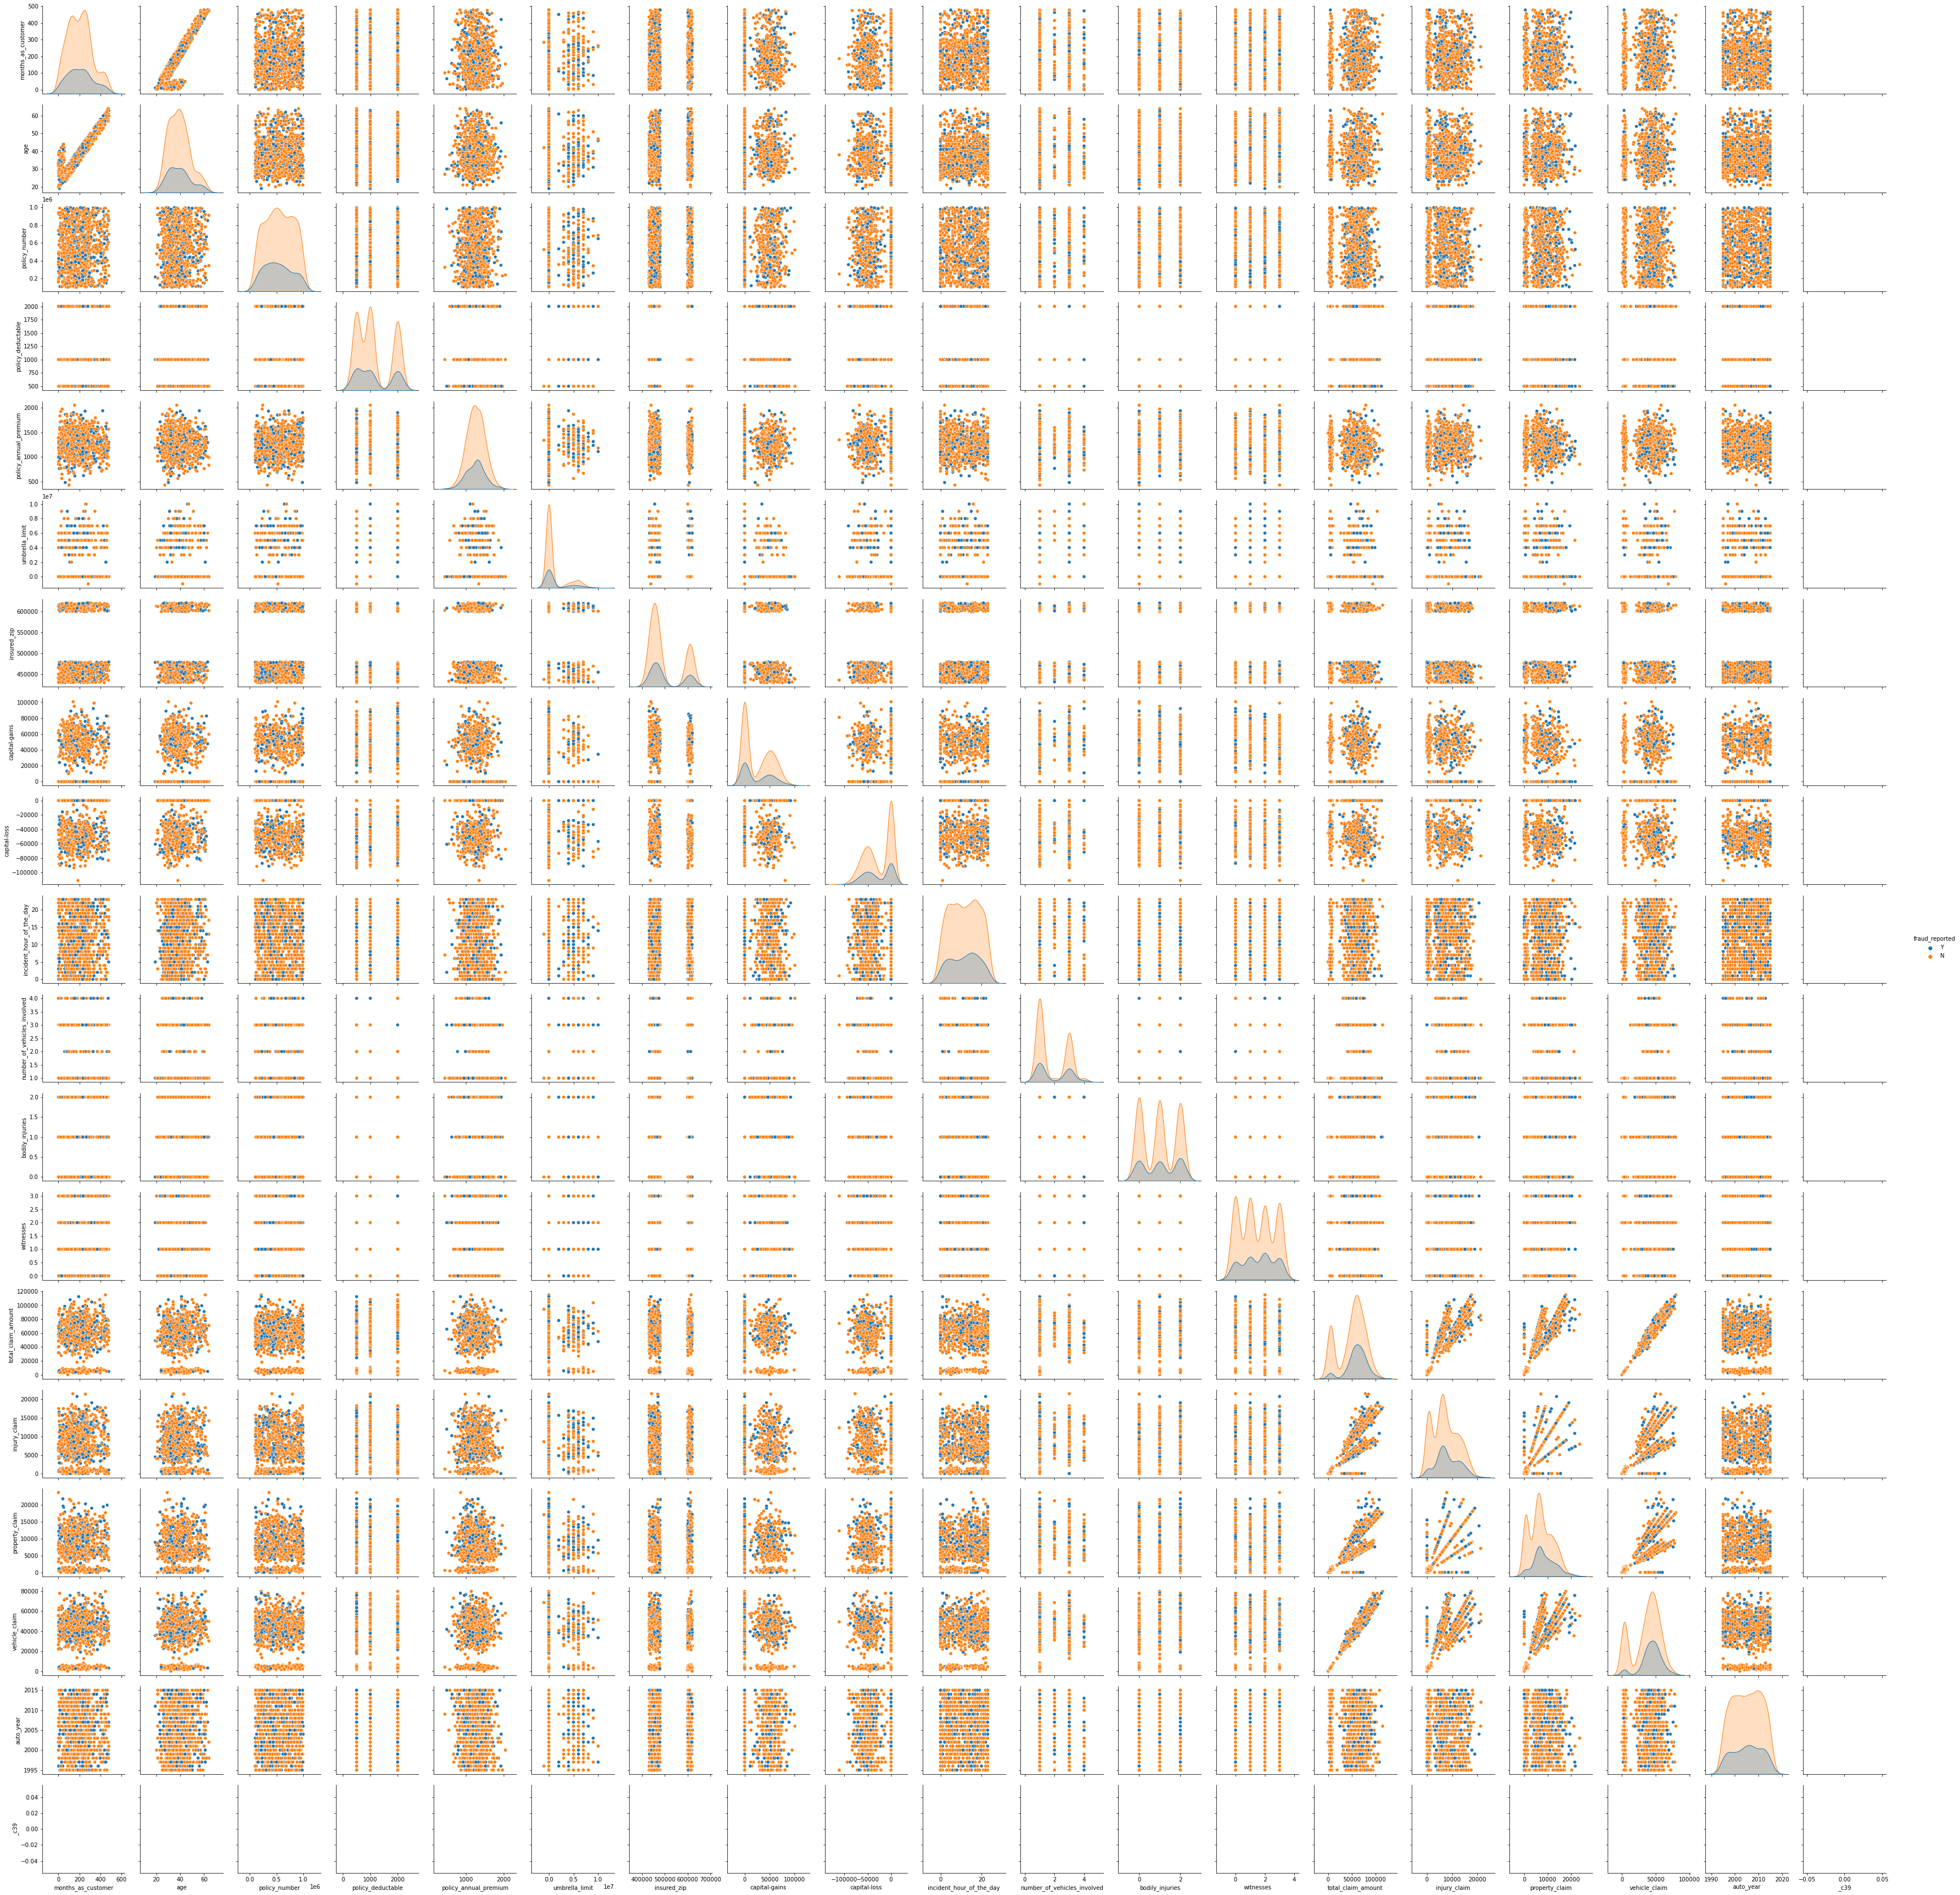

In [8]:
plt.figure(dpi = 200)
sns.pairplot(df, hue = 'fraud_reported');

In [9]:
# Checking for duplicated rows
df.duplicated().sum()

0

<br><br>

> **First Evaluation**
> * There are 40 rows consist of numerical, categorical and date types.
> * **fraud_reported** is the target label.
> * **_c39** column should be deleted as it has no use.
> * There seems to be no null values, in fact, there are null values but marked with signs such as '?'.
> * **policy_number** is an id column.
> * Both **months_as_customer** and **policy_bind_date** features give the same information. One of them should be removed to avoid multicolinearity. So **total_claim_amount** is clearly the total of other claims so it should be removed as well.
> * Types of the date columns seems as object type.
> * There are no duplicated rows.

<br><br>

First things first. Let's drop unnecessary columns.

In [10]:
df = df.drop(columns = ['_c39', 'policy_number', 'policy_bind_date', 'total_claim_amount'])

<br>We can also fix the type of the date column as we may use date later.

In [11]:
df['incident_date'] = pd.to_datetime(df['incident_date'])

<br>Also, we are not interested the numerical value of zip code. Zip address can be a categorical feature.

In [12]:
df['insured_zip'] = df['insured_zip'].astype('object')

<br><br>

<a id='analysis-2'></a>

### 3.2. Data Distribution

Let's begin with visualization of numeric data distribution.

#### 3.2.1. Numerical Features

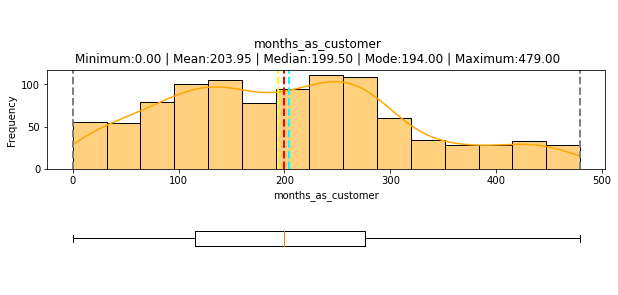

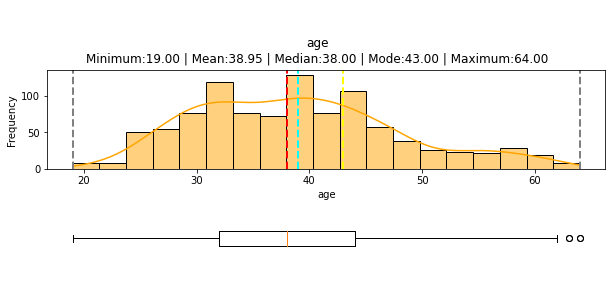

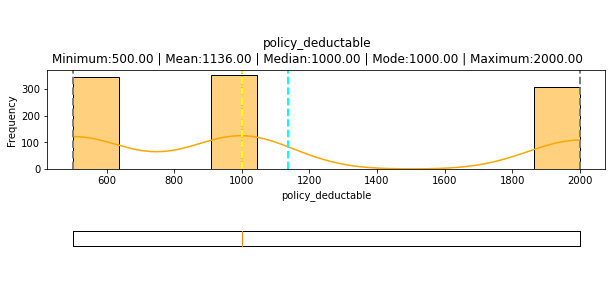

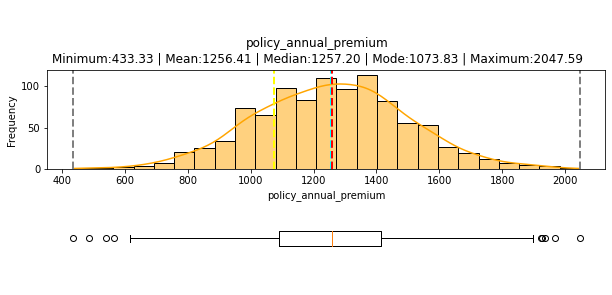

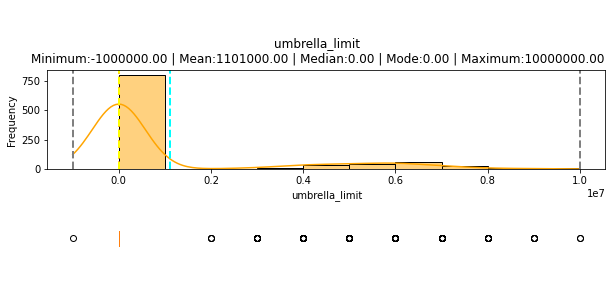

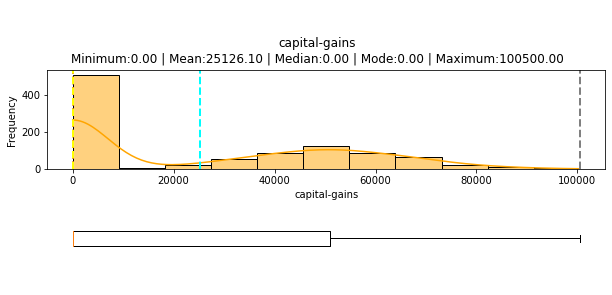

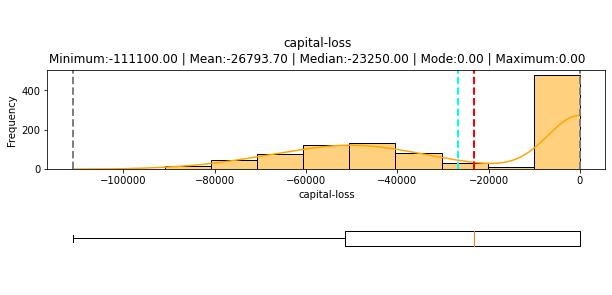

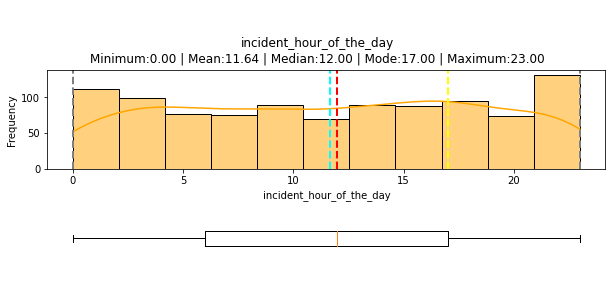

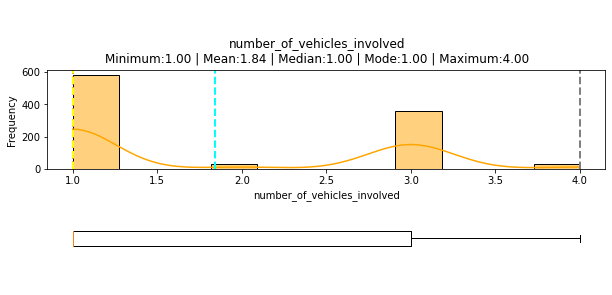

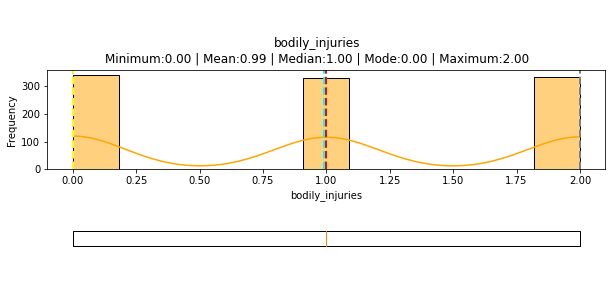

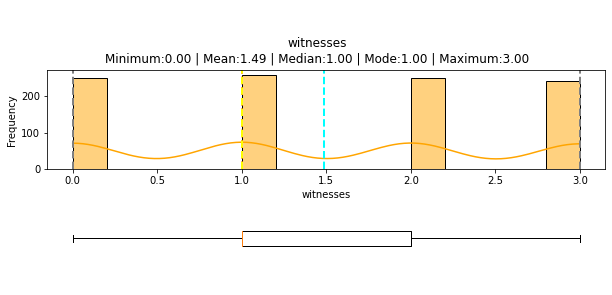

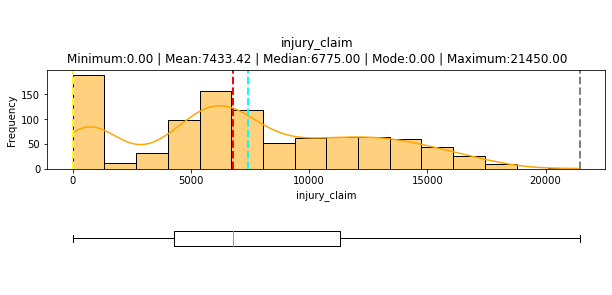

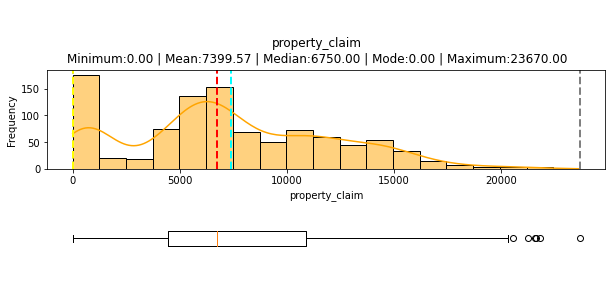

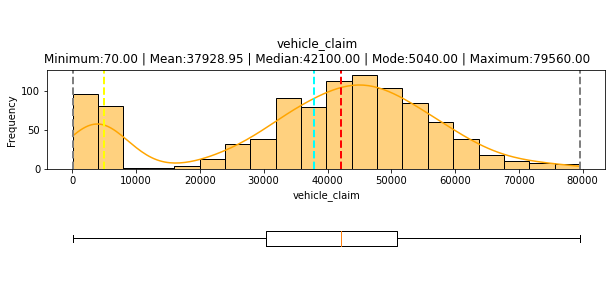

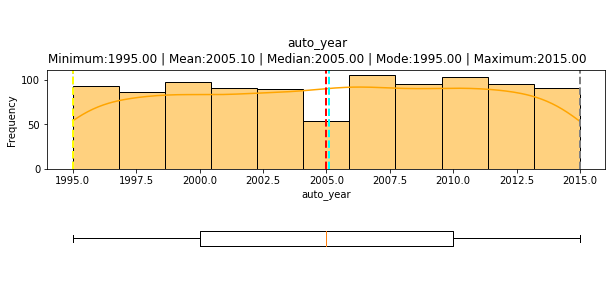

In [13]:
for col in df.select_dtypes(['int64', 'float64']).columns:
    var_data = df[col]

    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,4))

    # Plot the histogram   
    sns.histplot(var_data, ax = ax[0], kde = True, color = 'orange')
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot   
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')
    ax[1].axis('off')

    # Add a title to the Figure
    fig.suptitle('\n\n{}\nMinimum:{:.2f} | Mean:{:.2f} | Median:{:.2f} | Mode:{:.2f} | Maximum:{:.2f}\n'.format(col,
                                                                                            min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val), y = 1.1)
    # Show the figure
    fig.show()


<br><br>

> **Evaluation of Numeric Features**
> * Many of these features show normal distribution.
> * Some features may be categorical because they may have only few unique numbers. ex: **policy_deductable**
> * Some features have few unique numbers but they are ordinal categories, so we should leave them as they are. ex: **number_of_verhicles_involved**.
> * Some normally distributed features have second hills near the edges. We should examine them, because they may refer to null values. ex: **umbrella_limit**, **capital-gains**, **capital-loss**, **injury_claim**, **property_claim** and **vehicle_claim**
> * There seems no considerable outliers.

<br><br>

Let's start with **policy_deductable**.

In [14]:
df['policy_deductable']

0      1000
1      2000
2      2000
3      2000
4      1000
       ... 
995    1000
996    1000
997     500
998    2000
999    1000
Name: policy_deductable, Length: 1000, dtype: int64

In [15]:
df['policy_deductable'].unique()

array([1000, 2000,  500])

There are three unique policy_deductable values but it is more appropriate to leave it as numeric because it is probably a money amount that is known as policy deductible.

<br><br>

Now let's check the second hills in distributions of **umbrella_limit**, **capital-gains**, **capital-loss**, **injury_claim**, **property_claim** and **vehicle_claim**.

**Assumption:** They may be related to the target value. If they are similarly distributed, we can leave them.

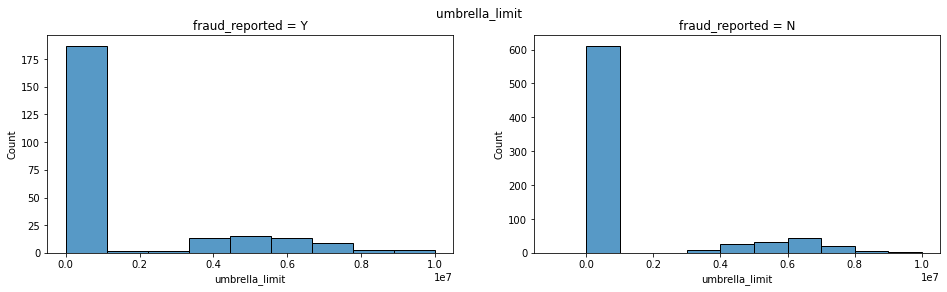

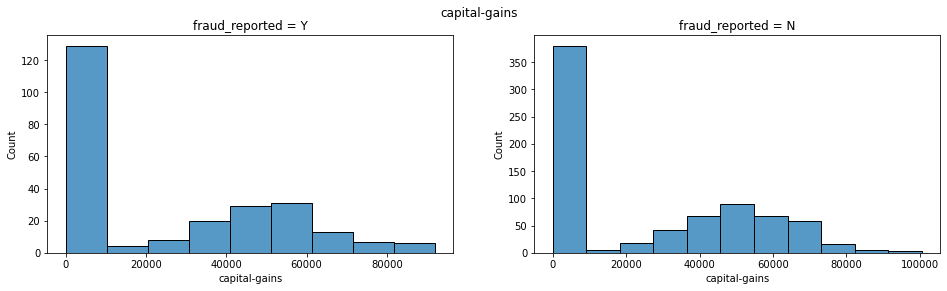

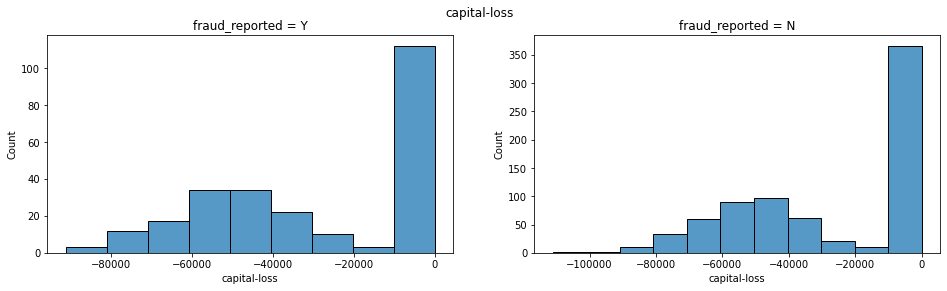

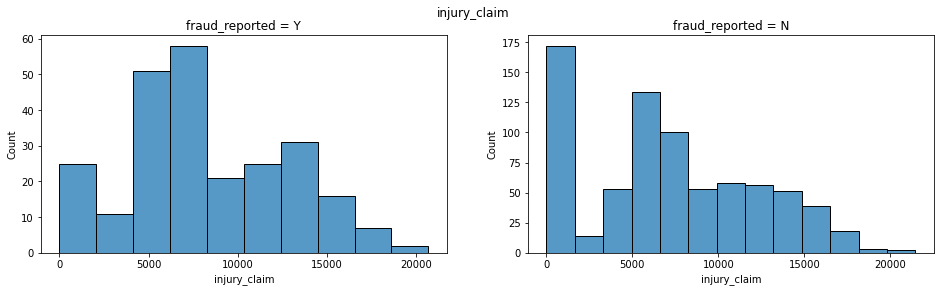

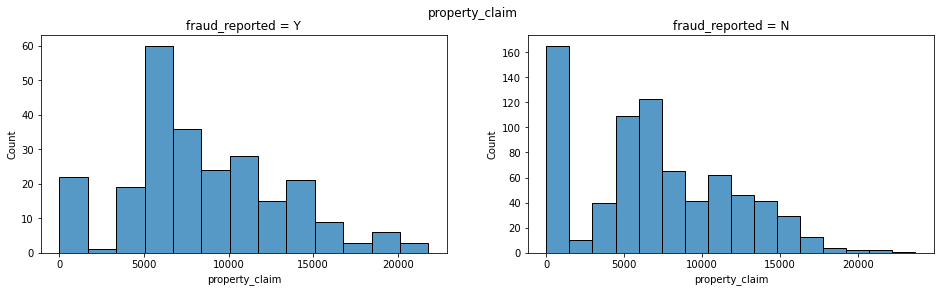

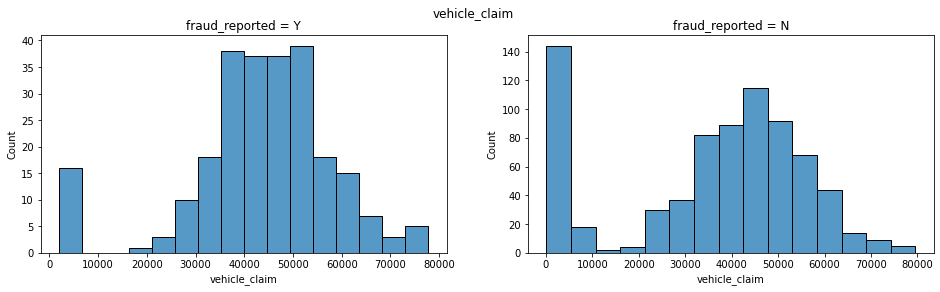

In [16]:
for col in ['umbrella_limit','capital-gains', 'capital-loss', 'injury_claim', 'property_claim', 'vehicle_claim']:

    fig, ax = plt.subplots(1,2,figsize = (16,4))

    ax[0].title.set_text('fraud_reported = Y')
    sns.histplot(df[df['fraud_reported'] == 'Y'][col], ax = ax[0])

    ax[1].title.set_text('fraud_reported = N')
    sns.histplot(df[df['fraud_reported'] == 'N'][col], ax = ax[1])
    plt.suptitle(col)
    plt.show();

**Result:** The distributions are similar with respect to the target value. We can leave them as they are.

<br><br>

#### 3.2.2. Categorical Features

In [17]:
df.select_dtypes('object')

policy_state policy_csl insured_zip insured_sex insured_education_level  \
0             OH    250/500      466132        MALE                      MD   
1             IN    250/500      468176        MALE                      MD   
2             OH    100/300      430632      FEMALE                     PhD   
3             IL    250/500      608117      FEMALE                     PhD   
4             IL   500/1000      610706        MALE               Associate   
..           ...        ...         ...         ...                     ...   
995           OH   500/1000      431289      FEMALE                 Masters   
996           IL    100/300      608177      FEMALE                     PhD   
997           OH    250/500      442797      FEMALE                 Masters   
998           IL   500/1000      441714        MALE               Associate   
999           OH    250/500      612260      FEMALE               Associate   

    insured_occupation insured_hobbies insured_relationship  \
0         craft-repair        sleeping              husband   
1    machine-op-inspct         reading       other-relative   
2                sales     board-games            own-child   
3         armed-forces     board-games            unmarried   
4                sales     board-games            unmarried   
..                 ...             ...                  ...   
995       craft-repair       paintball            unmarried   
996     prof-specialty        sleeping                 wife   
997       armed-forces  bungie-jumping       other-relative   
998  handlers-cleaners    base-jumping                 wife   
999              sales        kayaking              husband   

                incident_type   collision_type incident_severity  \
0    Single Vehicle Collision   Side Collision      Major Damage   
1               Vehicle Theft                ?      Minor Damage   
2     Multi-vehicle Collision   Rear Collision      Minor Damage   
3    Single Vehicle Collision  Front Collision      Major Damage   
4               Vehicle Theft                ?      Minor Damage   
..                        ...              ...               ...   
995  Single Vehicle Collision  Front Collision      Minor Damage   
996  Single Vehicle Collision   Rear Collision      Major Damage   
997   Multi-vehicle Collision   Side Collision      Minor Damage   
998  Single Vehicle Collision   Rear Collision      Major Damage   
999                Parked Car                ?      Minor Damage   

    authorities_contacted incident_state incident_city    incident_location  \
0                  Police             SC      Columbus       9935 4th Drive   
1                  Police             VA     Riverwood         6608 MLK Hwy   
2                  Police             NY      Columbus    7121 Francis Lane   
3                  Police             OH     Arlington     6956 Maple Drive   
4                    None             NY     Arlington         3041 3rd Ave   
..                    ...            ...           ...                  ...   
995                  Fire             NC    Northbrook   6045 Andromedia St   
996                  Fire             SC     Northbend     3092 Texas Drive   
997                Police             NC     Arlington          7629 5th St   
998                 Other             NY     Arlington        6128 Elm Lane   
999                Police             WV      Columbus  1416 Cherokee Ridge   

    property_damage police_report_available   auto_make auto_model  \
0               YES                     YES        Saab        92x   
1                 ?                       ?    Mercedes       E400   
2                NO                      NO       Dodge        RAM   
3                 ?                      NO   Chevrolet      Tahoe   
4                NO                      NO      Accura        RSX   
..              ...                     ...         ...        ...   
995             YES                       

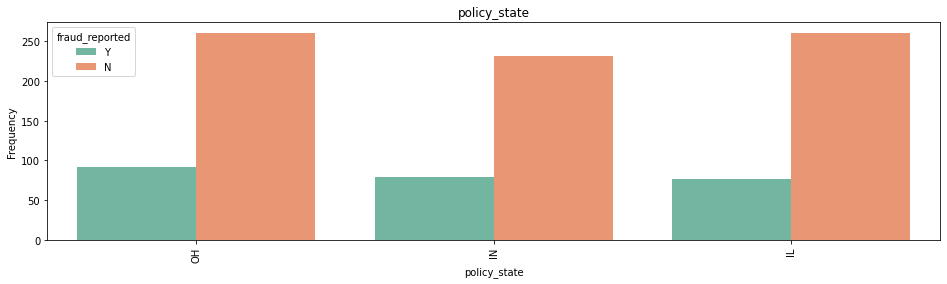

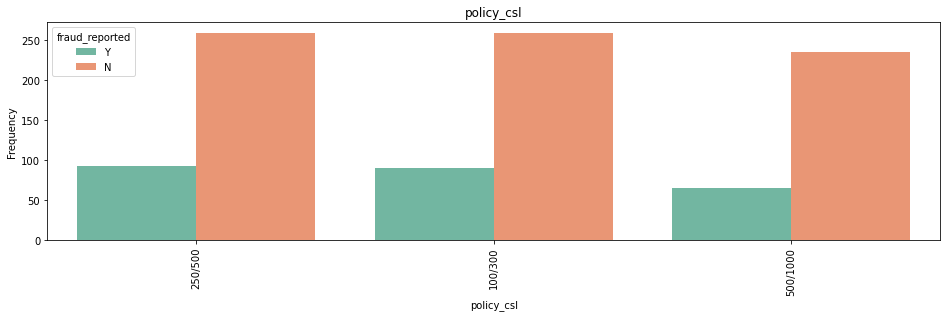

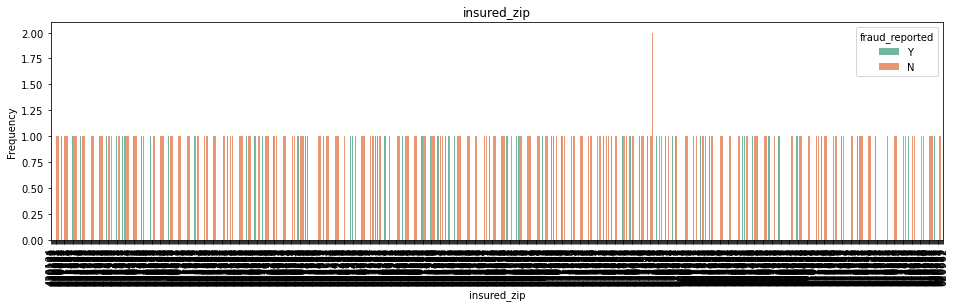

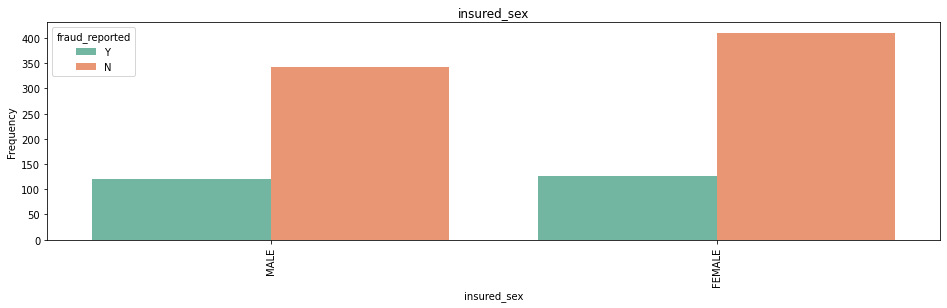

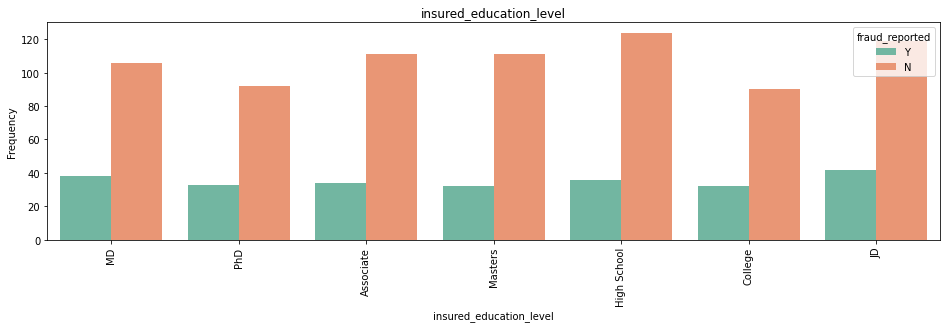

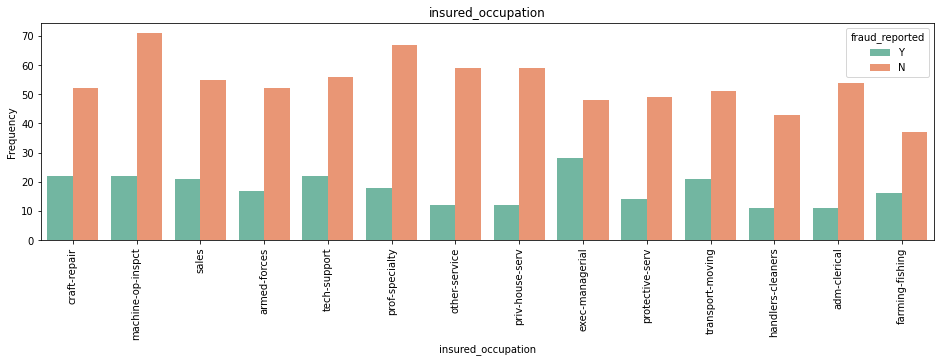

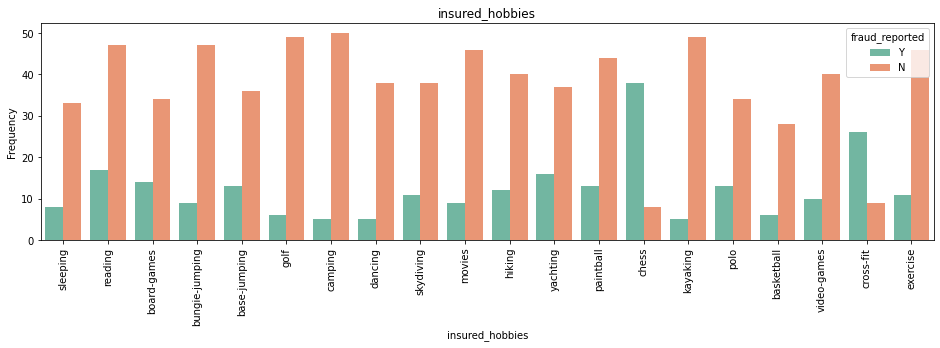

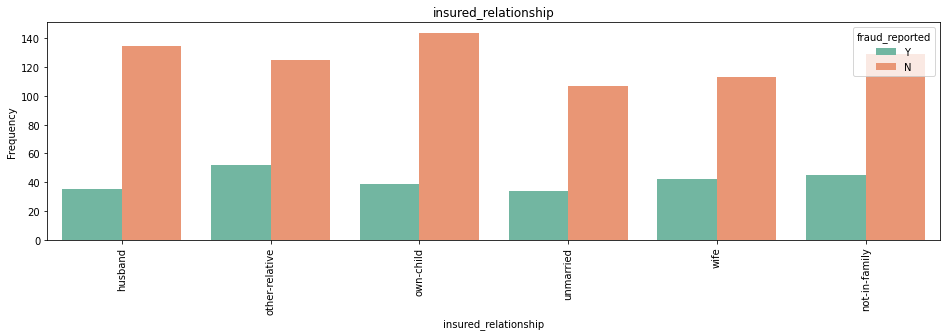

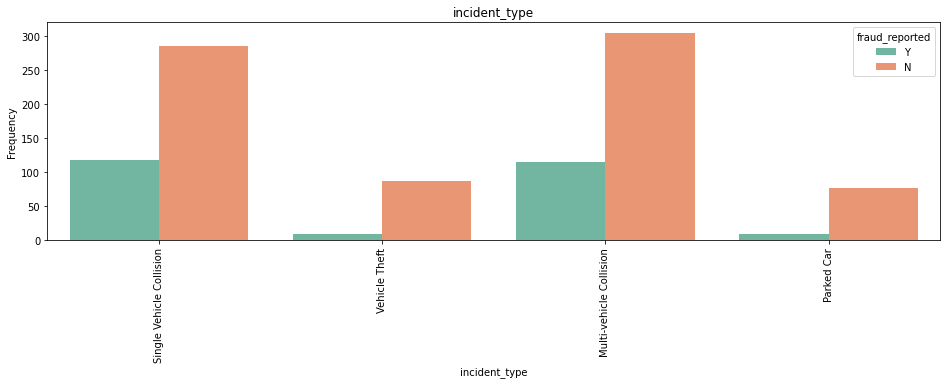

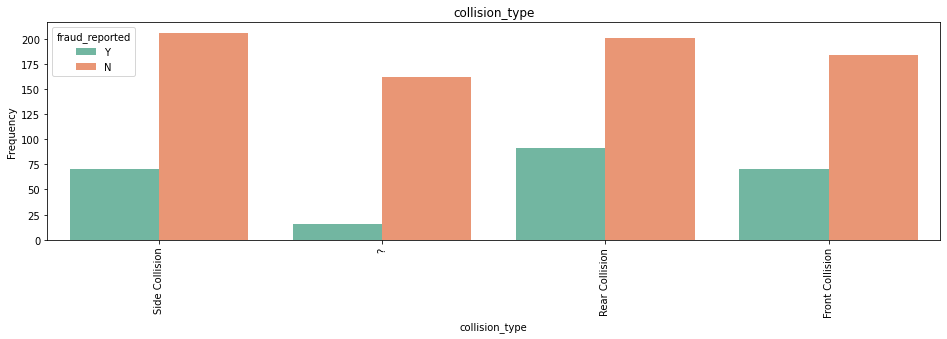

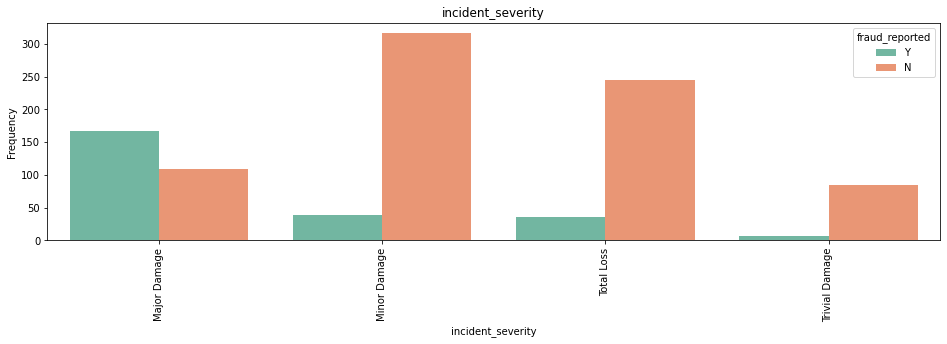

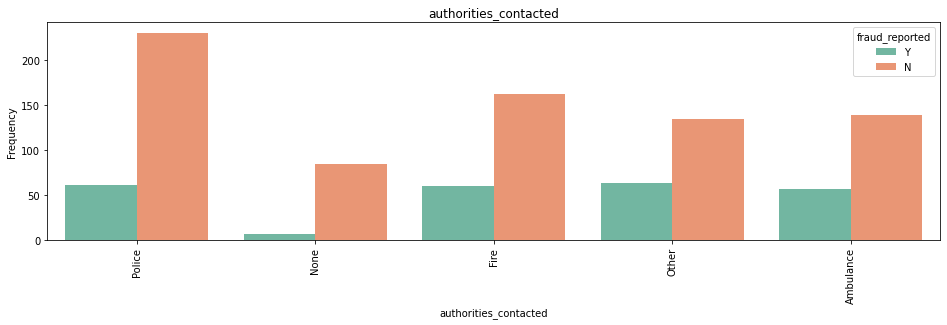

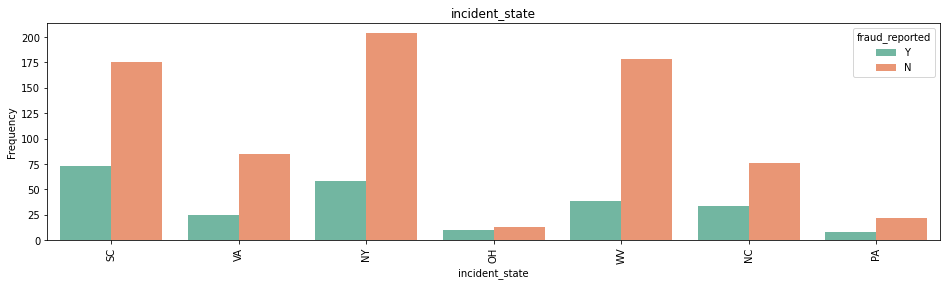

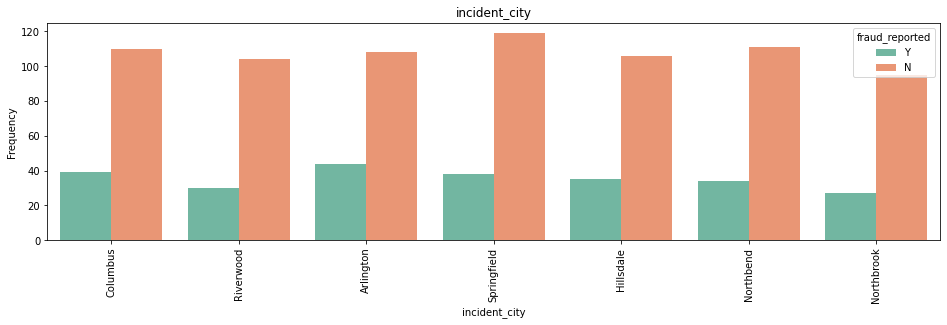

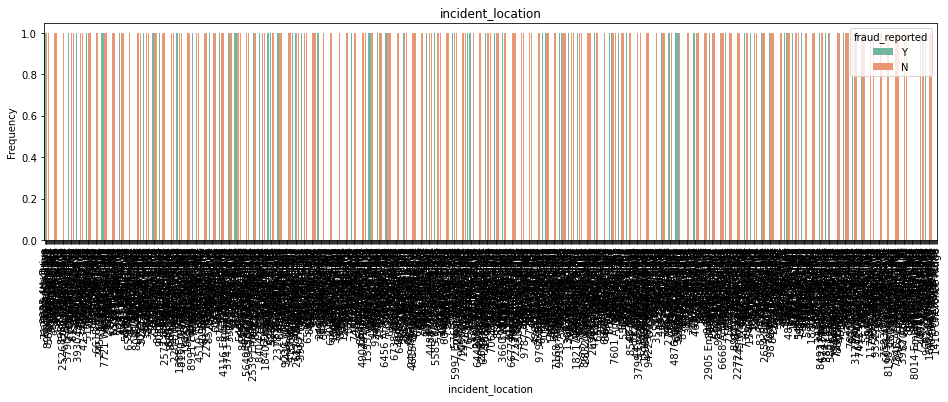

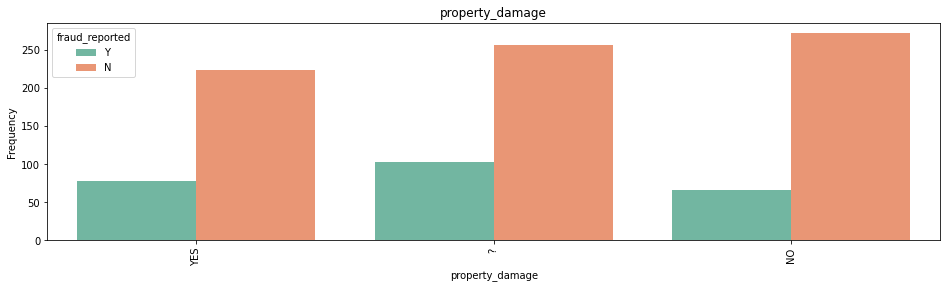

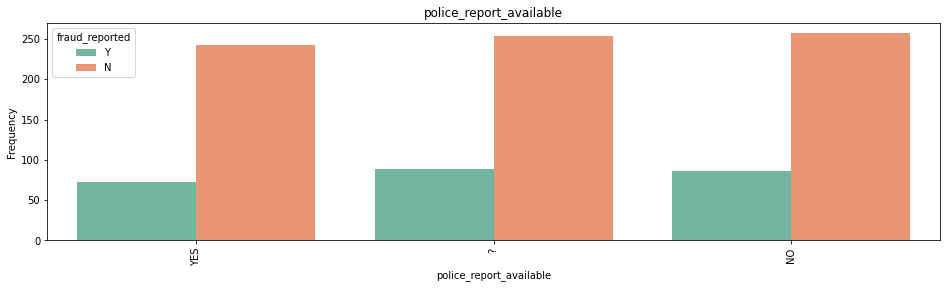

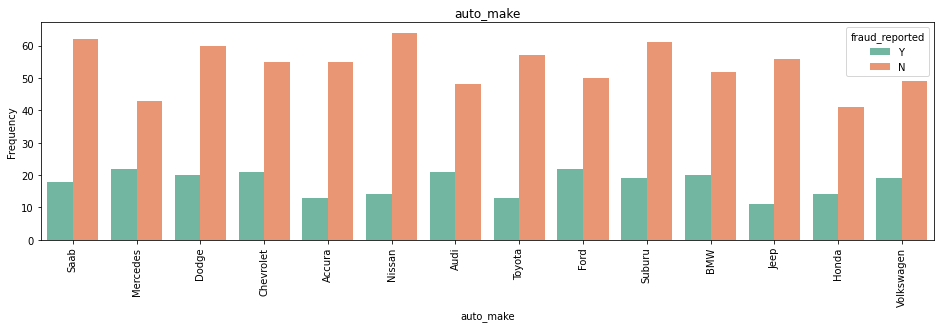

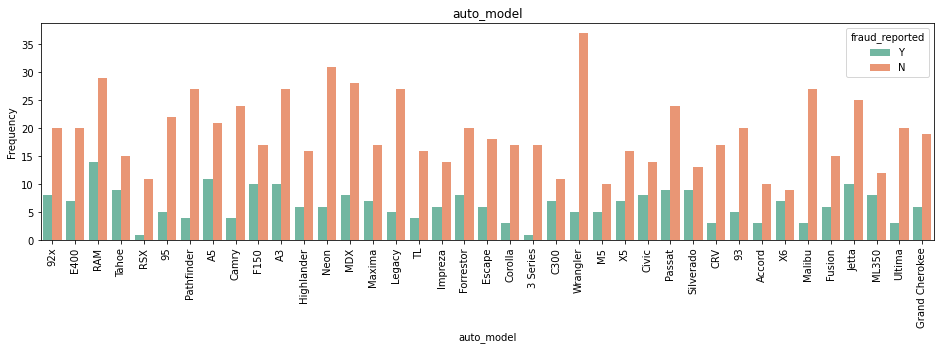

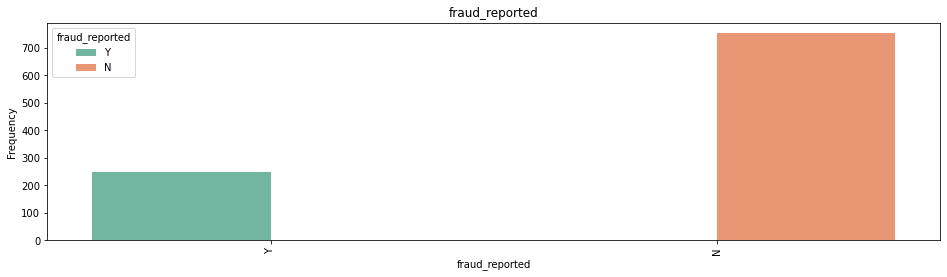

In [18]:
for col in df.select_dtypes('object').columns:
    var_data = df[col]
    
    # Plot the histogram  
    plt.figure(figsize = (16,4))
     
    sns.countplot(data = df, x = var_data, palette= 'Set2', hue = df['fraud_reported'])
    plt.ylabel('Frequency')
    plt.title(f'{col}')
    plt.xticks(rotation = 90)
    
    # Show the figure
    fig.show()


<br><br>

> **Evaluation of Categorical Features**
> * **insurance_zip** and **incident_location** values are mostly unique. Therefore, these values are not useful for predicting target value. These columns can be deleted.
> * There are question marks in some columns. These should be replaced with null values.

<br><br>

In [19]:
# Dropping unnecesarty columns
df = df.drop(columns=['insured_zip', 'incident_location'])

In [20]:
# Replacing missing values denoted by '?' with np.nan
df.replace('?', np.nan, inplace = True)

<br><br>

#### 3.2.3. Date Columns

In [21]:
# Check date columns
df.select_dtypes('datetime64[ns]')

incident_date
0      2015-01-25
1      2015-01-21
2      2015-02-22
3      2015-01-10
4      2015-02-17
..            ...
995    2015-02-22
996    2015-01-24
997    2015-01-23
998    2015-02-26
999    2015-02-26

[1000 rows x 1 columns]

Let's check if there is a trend of fraud with respect to the incident date.

<AxesSubplot:xlabel='incident_date', ylabel='Count'>

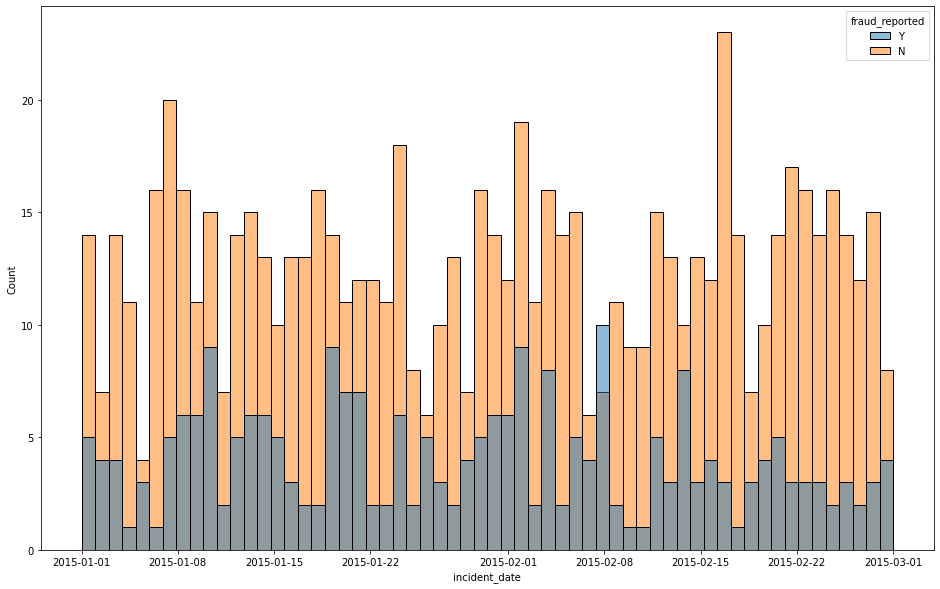

In [22]:
plt.figure(figsize = (16,10))
sns.histplot(df[['incident_date', 'fraud_reported']], 
             x = df['incident_date'], hue = df['fraud_reported'], bins = 60)

<br><br>

> **Evaluation of Date**
> * There is no clear pattern of fraud with respect to the date.
> * There are only two months. Thus, it will not be feasible to generate new features such as year, month or day. The best thing to do is removing **incident_date**.

<br><br>

In [23]:
# Removing incident_date column
df = df.drop(columns='incident_date')

<br>[Return to the Outline](#outline) <br>

<br><br>

<a id='preprocessing'></a>

## 4. Data Preprocessing

<br>

<a id='preprocessing-1'></a>

### 4.1. Handling Missing Values

Let's begin with checking missing values.

In [24]:
df.isnull().sum()

months_as_customer               0
age                              0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries                  0
witnesses                        0
police_report_available        343
injury_claim                     0
property_claim                   0
vehicle_claim       

<br><br>We do not know what may cause these missing values, but they are all categorical values. The count plot in the previous section shows that may be these features should be labeled as another category. So the missing values can be handled during encoding.

<a id='preprocessing-2'></a>

### 4.2. Encoding Categorical Features

We can use pandas getdummy() method to encode categorical values.

In [25]:
df = pd.get_dummies(df, drop_first = True, dummy_na = True)

In [26]:
# Removing dummy NaN variable to leave only one target value
df = df.drop(columns = 'fraud_reported_nan')

<br><br>

<a id='preprocessing-3'></a>

### 4.3. Handling Outliers

As we have seen in Data distribution figures, there are no considerable outliers. Still, it will be a good idea to apply **1.5 IQR technique** to the numerical features.

In [27]:
df.columns

Index(['months_as_customer', 'age', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'capital-gains',
       'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries',
       ...
       'auto_model_RSX', 'auto_model_Silverado', 'auto_model_TL',
       'auto_model_Tahoe', 'auto_model_Ultima', 'auto_model_Wrangler',
       'auto_model_X5', 'auto_model_X6', 'auto_model_nan', 'fraud_reported_Y'],
      dtype='object', length=158)

In [28]:
# Applying 1.5 IQR technique to numerical features

for col in df.select_dtypes(['int64', 'float64']):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR

    df[col] = df[col].apply(lambda x: lower_range if x < lower_range else x)
    df[col] = df[col].apply(lambda x: upper_range if x > upper_range else x)

<br><br>

<a id='preprocessing-4'></a>

### 4.4. Scaling Data

Some ML model requires scaling of numerical data.

In [29]:
# Scaling the numeric values in the dataset

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols = df.select_dtypes(['int64', 'float64']).columns

df[num_cols] = scaler.fit_transform(df[num_cols])

In [30]:
df.head()

months_as_customer       age  policy_deductable  policy_annual_premium  \
0            1.078140  0.993200          -0.222383               0.621182   
1            0.208995  0.335307           1.412784              -0.244857   
2           -0.608002 -1.090130           1.412784               0.646913   
3            0.452355  0.225658           1.412784               0.657651   
4            0.208995  0.554604          -0.222383               1.352209   

   umbrella_limit  capital-gains  capital-loss  incident_hour_of_the_day  \
0             0.0       1.011331      0.953851                 -0.956261   
1             0.0      -0.901927      0.953851                 -0.524475   
2             0.0       0.358023      0.953851                 -0.668404   
3             0.0       0.853388     -1.267577                 -0.956261   
4             0.0       1.467210     -0.683741                  1.202666   

   number_of_vehicles_involved  bodily_injuries  ...  auto_model_RSX  \
0                    -0.823865         0.009759  ...               0   
1                    -0.823865        -1.210174  ...               0   
2                     1.140056         1.229693  ...               0   
3                    -0.823865         0.009759  ...               0   
4                    -0.823865        -1.210174  ...               1   

   auto_model_Silverado  auto_model_TL  auto_model_Tahoe  auto_model_Ultima  \
0                     0              0                 0                  0   
1                     0              0                 0                  0   
2                     0              0                 0                  0   
3                     0              0                 1                  0   
4                     0              0                 0                  0   

   auto_model_Wrangler  auto_model_X5  auto_model_X6  auto_model_nan  \
0                    0              0              0               0   
1                    0              0              0               0   
2                    0              0              0               0   
3                    0              0              0               0   
4                    0              0              0               0   

   fraud_reported_Y  
0                 1  
1                 1  
2                 0  
3                 1  
4                 0  

[5 rows x 158 columns]

<br><br>

<a id='preprocessing-5'></a>

### 4.5. Handling Imbalanced Data

In general fraud cases have significantly low proportion. Let's begin with checking our data.

In [31]:
print('No Frauds', round(df['fraud_reported_Y'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['fraud_reported_Y'].value_counts()[1]/len(df) * 100,2), '% of the dataset')
print('Total number of records', len(df))

No Frauds 75.3 % of the dataset
Frauds 24.7 % of the dataset
Total number of records 1000


<AxesSubplot:xlabel='fraud_reported_Y', ylabel='count'>

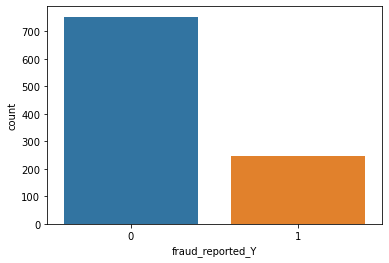

In [32]:
sns.countplot(df['fraud_reported_Y'])

<br>As we see, approximately 25% of our data is reported as fraud. We confirmed that the data are imbalanced, however, the number of records is so small that sub-sampling seems to be unfeasible as it requires significant loss of information which we do not have plenty to begin with. As a result, we can use **SMOTE** oversampling technique.<br><br>

In [33]:
from sklearn.model_selection import StratifiedShuffleSplit

# Determine X and y
X = df.drop('fraud_reported_Y', axis=1)
y = df['fraud_reported_Y']

# Split train/test data
# Stratified is better to keep label ratio of each split
sss = StratifiedShuffleSplit(n_splits = 5, random_state = 101, test_size = 0.2)

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]


# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(y_train, return_counts=True)
test_unique_label, test_counts_label = np.unique(y_test, return_counts=True)

print('Label Distributions: \n')
print(train_counts_label/ len(y_train))
print(test_counts_label/ len(y_test))

Label Distributions: 

[0.7525 0.2475]
[0.755 0.245]


In [34]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy='minority')
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

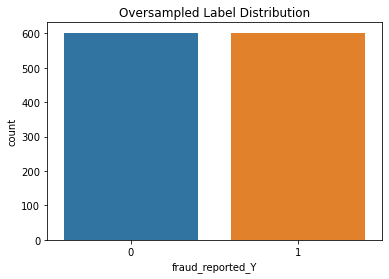

In [35]:
sns.countplot(y_train_res)
plt.title('Oversampled Label Distribution');

<br><br>
> * **Notice that** we have only oversampled training data so that we can later test our models on the test data similar to the original data.

<br>[Return to the Outline](#outline) <br>

<br><br>

<a id='mlmodels'></a>

## 5. ML Models

<a id='mlmodels-1'></a>

### 5.1. Classification Models

Let's define a function to create classification model with default values.

In [36]:
from sklearn.metrics import classification_report, plot_confusion_matrix, recall_score, f1_score

result_table = pd.DataFrame(columns = ['model', 'recall', 'f1'])

#define a function to test the models without tuning
def create_model(model):
    print('-'*50, '\n', str(model)[:50])
    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_test)
    result_table.loc[len(result_table)] = [str(model)[:50], recall_score(y_test, y_pred), f1_score(y_test, y_pred)]
    print(classification_report(y_test,y_pred),'\n\n')
    plot_confusion_matrix(model, X_test, y_test, cmap = 'Reds')
    plt.show();

We import classification models to automate the creating model process.

In [37]:
# Importing classification models

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier

class_models = [KNeighborsClassifier(), LogisticRegression(), SVC(), 
               GaussianNB(), MLPClassifier(), DecisionTreeClassifier(),
              RandomForestClassifier(), GradientBoostingClassifier(),
              XGBClassifier(), LGBMClassifier(), Perceptron(), SGDClassifier()]

-------------------------------------------------- 
 KNeighborsClassifier()
              precision    recall  f1-score   support

           0       1.00      0.05      0.10       151
           1       0.26      1.00      0.41        49

    accuracy                           0.28       200
   macro avg       0.63      0.53      0.25       200
weighted avg       0.82      0.28      0.18       200
 




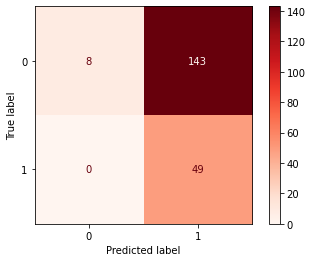

-------------------------------------------------- 
 LogisticRegression()
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       151
           1       0.65      0.65      0.65        49

    accuracy                           0.83       200
   macro avg       0.77      0.77      0.77       200
weighted avg       0.83      0.83      0.83       200
 




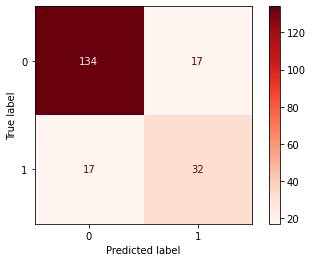

-------------------------------------------------- 
 SVC()
              precision    recall  f1-score   support

           0       0.78      0.96      0.86       151
           1       0.60      0.18      0.28        49

    accuracy                           0.77       200
   macro avg       0.69      0.57      0.57       200
weighted avg       0.74      0.77      0.72       200
 




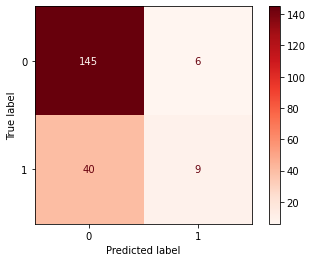

-------------------------------------------------- 
 GaussianNB()
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       151
           1       0.43      0.33      0.37        49

    accuracy                           0.73       200
   macro avg       0.61      0.59      0.60       200
weighted avg       0.71      0.73      0.72       200
 




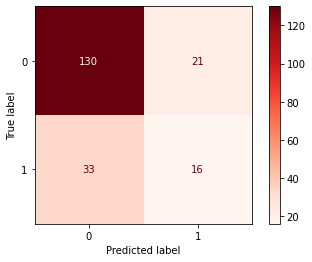

-------------------------------------------------- 
 MLPClassifier()
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       151
           1       0.54      0.43      0.48        49

    accuracy                           0.77       200
   macro avg       0.68      0.65      0.66       200
weighted avg       0.76      0.77      0.76       200
 




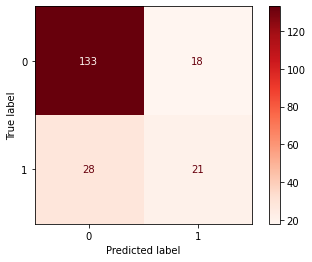

-------------------------------------------------- 
 DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       0.88      0.87      0.88       151
           1       0.62      0.63      0.63        49

    accuracy                           0.81       200
   macro avg       0.75      0.75      0.75       200
weighted avg       0.82      0.81      0.82       200
 




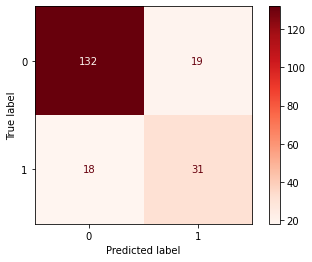

-------------------------------------------------- 
 RandomForestClassifier()
              precision    recall  f1-score   support

           0       0.81      0.93      0.87       151
           1       0.61      0.35      0.44        49

    accuracy                           0.79       200
   macro avg       0.71      0.64      0.65       200
weighted avg       0.76      0.79      0.76       200
 




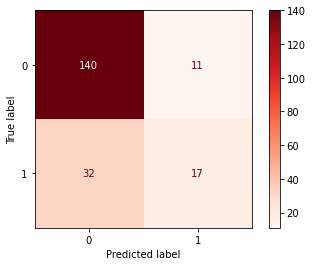

-------------------------------------------------- 
 GradientBoostingClassifier()
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       151
           1       0.64      0.76      0.69        49

    accuracy                           0.83       200
   macro avg       0.78      0.81      0.79       200
weighted avg       0.85      0.83      0.84       200
 




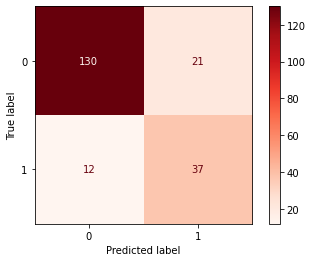

-------------------------------------------------- 
 XGBClassifier(base_score=None, booster=None, callb
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       151
           1       0.60      0.55      0.57        49

    accuracy                           0.80       200
   macro avg       0.73      0.72      0.72       200
weighted avg       0.79      0.80      0.80       200
 




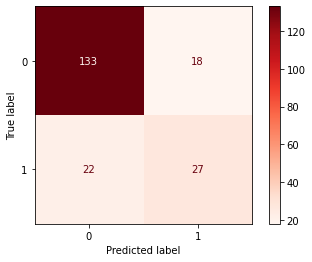

-------------------------------------------------- 
 LGBMClassifier()
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       151
           1       0.60      0.61      0.61        49

    accuracy                           0.81       200
   macro avg       0.74      0.74      0.74       200
weighted avg       0.81      0.81      0.81       200
 




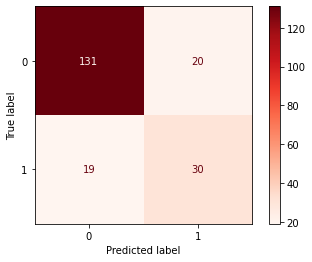

-------------------------------------------------- 
 Perceptron()
              precision    recall  f1-score   support

           0       0.88      0.89      0.89       151
           1       0.66      0.63      0.65        49

    accuracy                           0.83       200
   macro avg       0.77      0.76      0.77       200
weighted avg       0.83      0.83      0.83       200
 




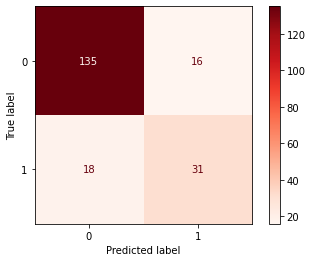

-------------------------------------------------- 
 SGDClassifier()
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       151
           1       0.55      0.61      0.58        49

    accuracy                           0.78       200
   macro avg       0.71      0.72      0.71       200
weighted avg       0.79      0.78      0.78       200
 




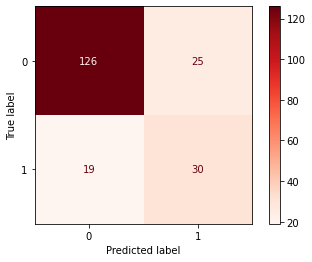

In [38]:
for model in class_models:
    create_model(model)

<AxesSubplot:ylabel='model'>

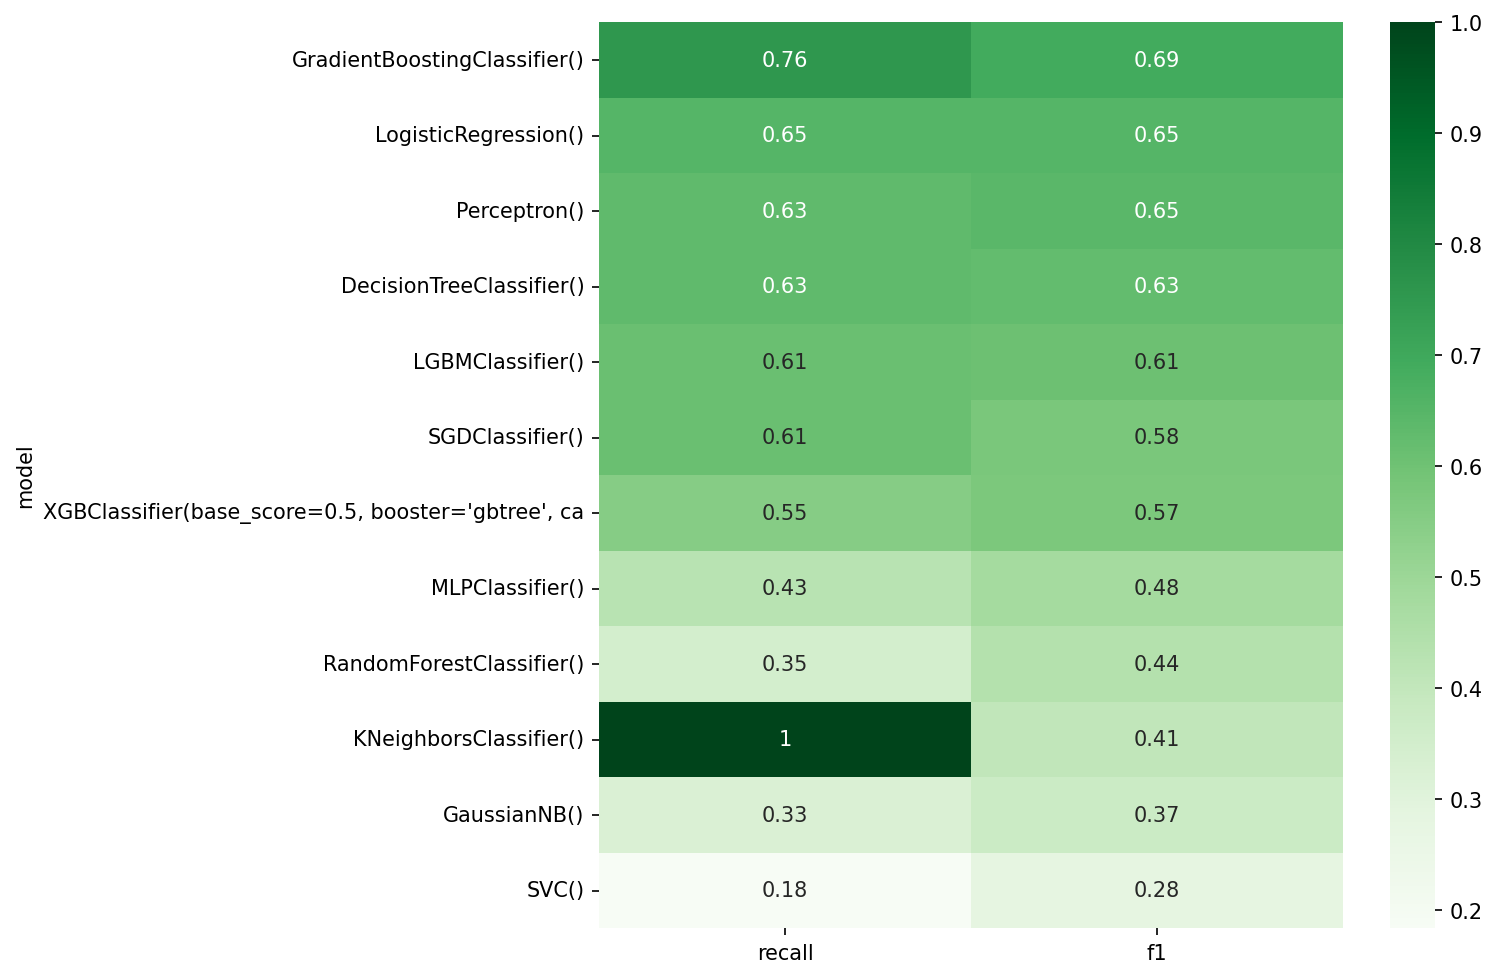

In [39]:
plt.figure(figsize = (8,8), dpi = 150)
sns.heatmap(result_table.set_index('model').sort_values(by = 'f1', ascending = False), annot = True, cmap = 'Greens')

<br><br>

> **Evaluation of Results**
> * **GradientBoosting** gives the best result for our data set. It has the highest f1 score and the second best recall score. These scores may be even better after hyperparameter tuning.
> * **KNeigbors** catches 98% of the frauds, however, it achieves that marking almost all data as fraud.

<br><br>

<a id='mlmodels-2'></a>

### 5.2. Model Tuning

In this section, we will try to tune our GradientBoostingClassifier to try getting better scores.

In [40]:
from sklearn.model_selection import RandomizedSearchCV
model = GradientBoostingClassifier()

model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [41]:
param_grid = {"learning_rate" : [0.001, 0.01, 0.1, 0.05],
             "n_estimators": [100,500,100],
             "max_depth": [3,5,10],
             "min_samples_split": [2,5,10]}

In [42]:
cv_model = RandomizedSearchCV(model, param_grid, cv=5, scoring = 'f1')
cv_model.fit(X_train_res, y_train_res)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(),
                   param_distributions={'learning_rate': [0.001, 0.01, 0.1,
                                                          0.05],
                                        'max_depth': [3, 5, 10],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 500, 100]},
                   scoring='f1')

In [43]:
cv_model.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'max_depth': 5,
 'learning_rate': 0.01}

In [44]:
model = GradientBoostingClassifier(n_estimators = 100, min_samples_split = 2, max_depth = 10, learning_rate = 0.1)

-------------------------------------------------- 
 GradientBoostingClassifier(max_depth=10)
              precision    recall  f1-score   support

           0       0.95      0.85      0.90       151
           1       0.66      0.86      0.74        49

    accuracy                           0.85       200
   macro avg       0.80      0.86      0.82       200
weighted avg       0.88      0.85      0.86       200
 




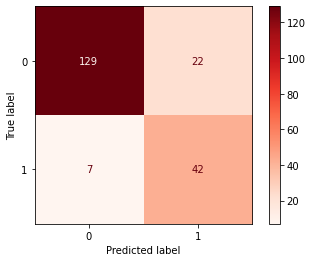

In [45]:
create_model(model)

<AxesSubplot:ylabel='model'>

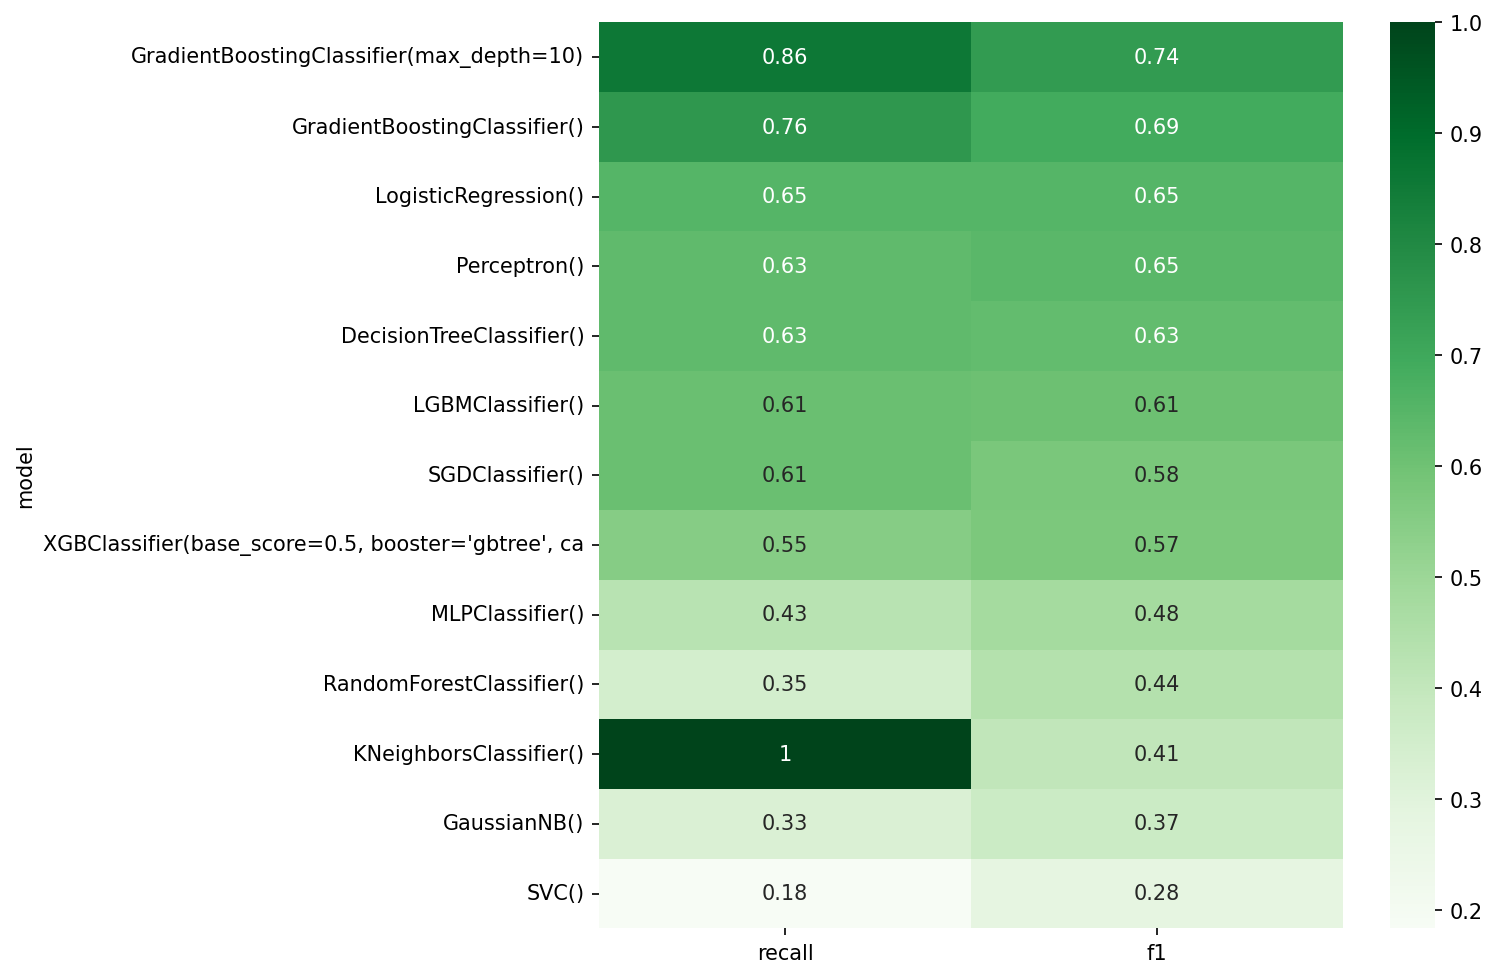

In [46]:
plt.figure(figsize = (8,8), dpi = 150)
sns.heatmap(result_table.set_index('model').sort_values(by = 'f1', ascending = False), annot = True, cmap = 'Greens')

> **Evaluation of Results**
> * Tuned model gives relatively better f1 score, yet, it is able to catch a higher rate of frauds, 86%.

<br><br>

<a id='mlmodels-3'></a>

### 5.3. Feature Importance

Let's check which features are the most effective to detect fraud.

In [47]:
# Creating a dataframe for feature importances
imp_feats = pd.DataFrame(data = model.feature_importances_,
                         index = X.columns,columns = ['Feature Importance']).sort_values("Feature Importance")

In [48]:
# Filtering the 20 most effective features to show them on a figure
imp_feats = imp_feats.sort_values('Feature Importance', ascending = False).head(20)

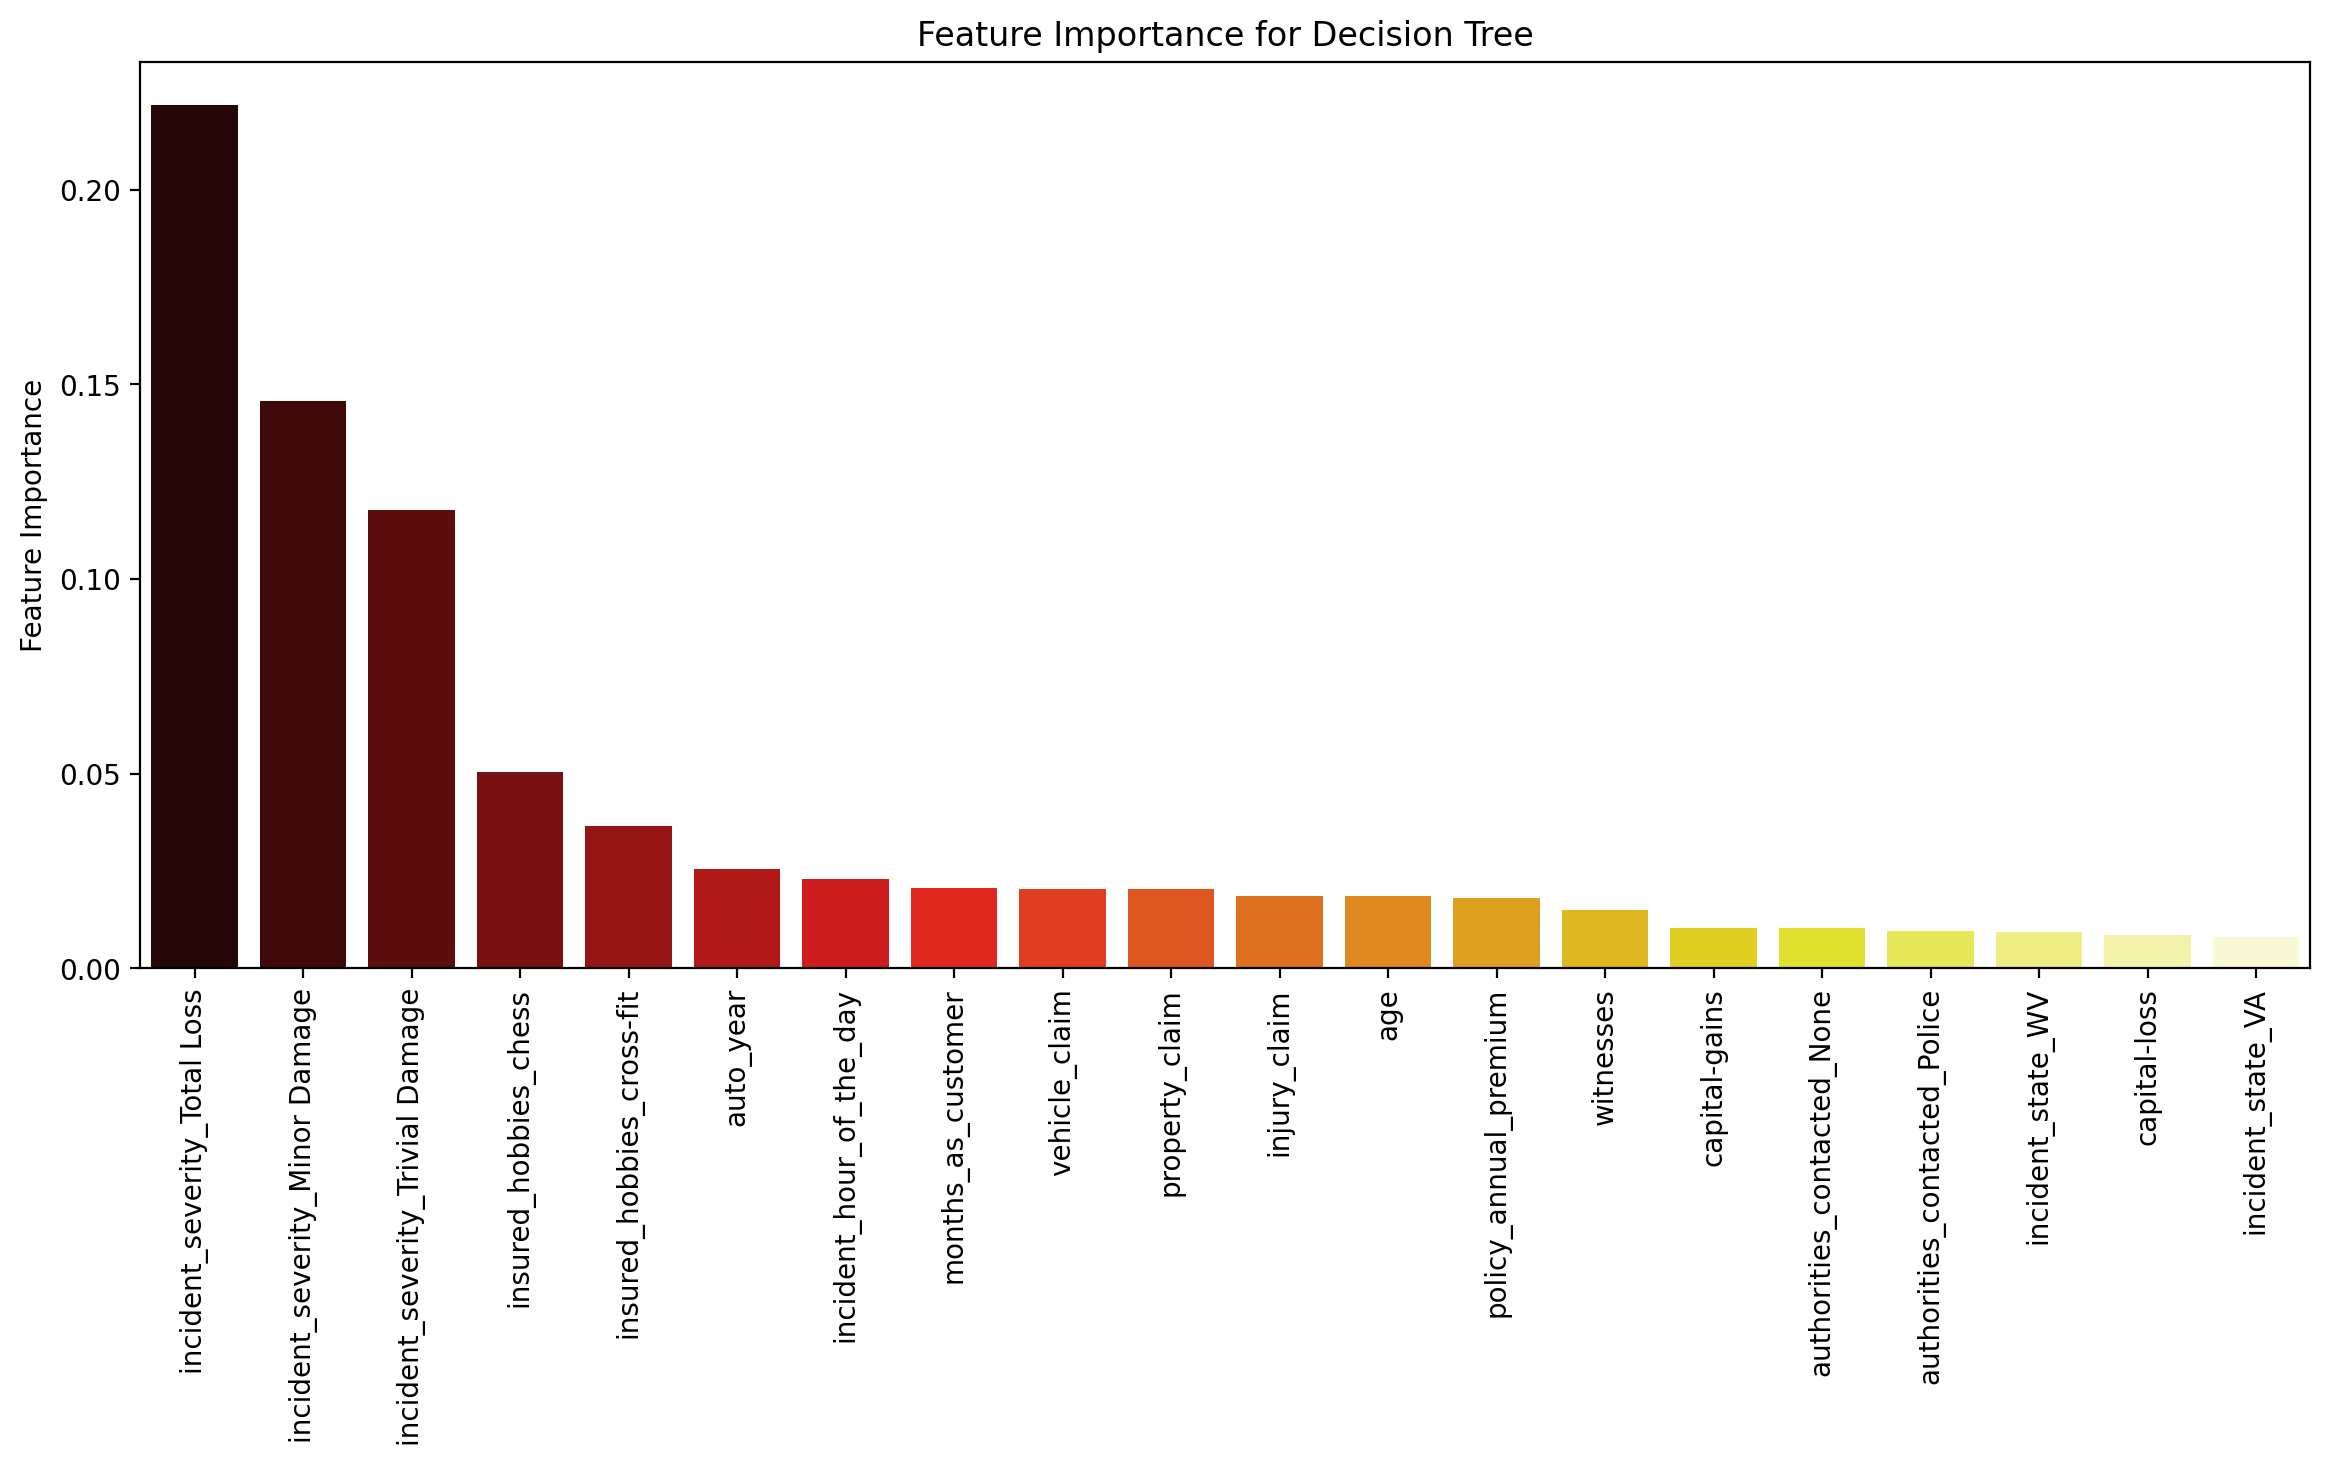

In [49]:
plt.figure(figsize = (14,6), dpi = 200)
sns.barplot(data = imp_feats,
            x = imp_feats.index,
            y = 'Feature Importance', palette = 'hot')
plt.xticks(rotation = 90)
plt.title("Feature Importance for Decision Tree");

> **Evaluation of Feature Importances**
> * It seems severity of incidents and hobbies plays the most critical role for detecting frauds.

<br>[Return to the Outline](#outline) <br>

<br><br>

<a id='conclusion'></a>

## 6. Conclusion

Over the years, the importance of data science in insurance area has increased significantly. One of the most important uses of data science in this area is the fraud detection. Anomality detection techniques are used to detect fraud or other abnormal activities. In this study, fraud detection techniques are used to detect frauds with a ML model. 

Frauds can be catched with ML algorithms. However, an important problem in fraud detection should be considered that is imbalanced data. To be more clear, fraud instances are rare in general, so a ML model can mark all data as not fraud and still get a pretty good result. To avoid this problem, oversampling techniques such as **SMOTE** is applied to the training data after data preprocessing. 

Various classification algorithms from the scikit-learn library is created to detect frauds. Another point for consideration in fraud detection is the target score. This kind of problems we try to catch frauds, so our main focus is how many of the actual frauds we catched, i.e. **recall**. We should also focus on **f1 score** so that we can check if the model marks all data as fraud to maximize recall score. 

Last but not least, we found that **GradientBoostingClassifier** gives the best score, therefore, we tune this model and able to catch **86% of the frauds**. We also list the features' importances and find out that **severity of incident** and **hobbies of the insured people** are the most decisive factors for detecting frauds.

> **Check my other works in my Github Page** https://github.com/DrFarukAydin/data-science-portfolio

This data is also used to create a dashboard in **Tableau**. <a href="https://public.tableau.com/app/profile/omer.faruk.aydin/viz/InsuranceFraudsDashboard/Dashboard1?publish=yes">Click here for the interactive dashboard.</a>

<a href="https://public.tableau.com/app/profile/omer.faruk.aydin/viz/InsuranceFraudsDashboard/Dashboard1?publish=yes"><img src='fraud_dashboard.jpg' width='800px' align='left'></a>

<br>[Return to the Outline](#outline) <br>